# Analytics Practicum I - Assignment 2

## Dissecting Spotify Valence

> Konstantinos Ninas, f2822108 <br />
> MSc in Business Analytics <br />
> Department of Management Science and Technology <br />
> Athens University of Economics and Business <br />
> f2822108@aueb.gr

In [181]:
#import libraries
import pandas as pd
import numpy as np
import zipfile
import spotipy
import math
import statsmodels.api as sm
from plotnine import *
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [182]:
#file reading - file 1
Spotify1 = pd.read_csv('genres_v2.csv')
Spotify1 = Spotify1.drop(['genre', 'song_name', 'analysis_url', 'track_href', 'uri', 'type']
                         ,axis = 1)
Spotify1

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
0,0.831,0.814,2,-7.364,1,0.4200,0.059800,0.013400,0.0556,0.3890,156.985,2Vc6NJ9PW9gD9q343XFRKx,124539,4
1,0.719,0.493,8,-7.230,1,0.0794,0.401000,0.000000,0.1180,0.1240,115.080,7pgJBLVz5VmnL7uGHmRj6p,224427,4
2,0.850,0.893,5,-4.783,1,0.0623,0.013800,0.000004,0.3720,0.0391,218.050,0vSWgAlfpye0WCGeNmuNhy,98821,4
3,0.476,0.781,0,-4.710,1,0.1030,0.023700,0.000000,0.1140,0.1750,186.948,0VSXnJqQkwuH2ei1nOQ1nu,123661,3
4,0.798,0.624,2,-7.668,1,0.2930,0.217000,0.000000,0.1660,0.5910,147.988,4jCeguq9rMTlbMmPHuO7S3,123298,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
42300,0.528,0.693,4,-5.148,1,0.0304,0.031500,0.000345,0.1210,0.3940,150.013,46bXU7Sgj7104ZoXxzz9tM,269208,4
42301,0.517,0.768,0,-7.922,0,0.0479,0.022500,0.000018,0.2050,0.3830,149.928,0he2ViGMUO3ajKTxLOfWVT,210112,4
42302,0.361,0.821,8,-3.102,1,0.0505,0.026000,0.000242,0.3850,0.1240,154.935,72DAt9Lbpy9EUS29OzQLob,234823,4
42303,0.477,0.921,6,-4.777,0,0.0392,0.000551,0.029600,0.0575,0.4880,150.042,6HXgExFVuE1c3cq9QjFCcU,323200,4


In [183]:
#some observations seem to have wrong time_signature values, these values are removed
round(Spotify1.describe(),2) 

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
count,42305.00,42305.00,42305.00,42305.00,42305.00,42305.00,42305.00,42305.00,42305.00,42305.00,42305.00,42305.00,42305.00
mean,0.64,0.76,5.37,-6.47,0.55,0.14,0.10,0.28,0.21,0.36,147.47,250865.85,3.97
std,0.16,0.18,3.67,2.94,0.50,0.13,0.17,0.37,0.18,0.23,23.84,102957.71,0.27
min,0.07,0.00,0.00,-33.36,0.00,0.02,0.00,0.00,0.01,0.02,57.97,25600.00,1.00
25%,0.52,0.63,1.00,-8.16,0.00,0.05,0.00,0.00,0.10,0.16,129.93,179840.00,4.00
50%,0.65,0.80,6.00,-6.23,1.00,0.08,0.02,0.01,0.14,0.32,144.97,224760.00,4.00
75%,0.77,0.92,9.00,-4.51,1.00,0.19,0.11,0.72,0.29,0.52,161.46,301133.00,4.00
max,0.99,1.00,11.00,3.15,1.00,0.95,0.99,0.99,0.99,0.99,220.29,913052.00,5.00


In [184]:
#file reading - file 2
zf = zipfile.ZipFile('SpotifyFeatures.zip') 
Spotify2 = pd.read_csv(zf.open('SpotifyFeatures.csv'))
ColstoDrop = ['genre', 'artist_name', 'track_name', 'popularity']
Spotify2 = Spotify2.drop(ColstoDrop, axis = 1)
Spotify2 #key, time_signature and mode variables are in wrong format

,track_id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0BRjO6ga9RKCKjfDqeFgWV,0.61100,0.389,99373,0.910,0.000000,C#,0.3460,-1.828,Major,0.0525,166.969,4/4,0.814
1,0BjC1NfoEOOusryehmNudP,0.24600,0.590,137373,0.737,0.000000,F#,0.1510,-5.559,Minor,0.0868,174.003,4/4,0.816
2,0CoSDzoNIKCRs124s9uTVy,0.95200,0.663,170267,0.131,0.000000,C,0.1030,-13.879,Minor,0.0362,99.488,5/4,0.368
3,0Gc6TVm52BwZD07Ki6tIvf,0.70300,0.240,152427,0.326,0.000000,C#,0.0985,-12.178,Major,0.0395,171.758,4/4,0.227
4,0IuslXpMROHdEPvSl1fTQK,0.95000,0.331,82625,0.225,0.123000,F,0.2020,-21.150,Major,0.0456,140.576,4/4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,2XGLdVl7lGeq8ksM6Al7jT,0.00384,0.687,326240,0.714,0.544000,D,0.0845,-10.626,Major,0.0316,115.542,4/4,0.962
232721,1qWZdkBl4UVPj9lK6HuuFM,0.03290,0.785,282447,0.683,0.000880,E,0.2370,-6.944,Minor,0.0337,113.830,4/4,0.969
232722,2ziWXUmQLrXTiYjCg2fZ2t,0.90100,0.517,166960,0.419,0.000000,D,0.0945,-8.282,Major,0.1480,84.135,4/4,0.813
232723,6EFsue2YbIG4Qkq8Zr9Rir,0.26200,0.745,222442,0.704,0.000000,A,0.3330,-7.137,Major,0.1460,100.031,4/4,0.489


In [185]:
#fixing key variable
key_update = {'C':0, 'C#':1, 'D': 2, 'D#':3, 'E':4, 'F':5, 'F#':6, 'G':7, 'G#':8, 'A':9, 'A#':10, 'B':11 }
f = lambda x: key_update.get(x, x) 
Spotify2.loc[:, 'key'] = Spotify2.loc[:, 'key'].map(f)
Spotify2.key.unique()

array([ 1,  6,  0,  5,  7,  4,  3,  8,  2, 10,  9, 11], dtype=int64)

In [186]:
#update track_id variable's name to id
Spotify2 = Spotify2.rename({'track_id': 'id'}, axis=1)
Spotify2.columns

Index(['id', 'acousticness', 'danceability', 'duration_ms', 'energy',
       'instrumentalness', 'key', 'liveness', 'loudness', 'mode',
       'speechiness', 'tempo', 'time_signature', 'valence'],
      dtype='object')

In [187]:
#fixing mode variable
mode_update = {'Major':1, 'Minor':0}
f2 = lambda x: mode_update.get(x, x) 
Spotify2.loc[:, 'mode'] = Spotify2.loc[:, 'mode'].map(f2)
Spotify2['mode'].unique()

array([1, 0], dtype=int64)

In [188]:
#fixing time_signature variable
Spotify2['time_signature'] = Spotify2['time_signature'].str[:1]
Spotify2 = Spotify2.astype({'time_signature':int})
Spotify2

,id,acousticness,danceability,duration_ms,energy,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0BRjO6ga9RKCKjfDqeFgWV,0.61100,0.389,99373,0.910,0.000000,1,0.3460,-1.828,1,0.0525,166.969,4,0.814
1,0BjC1NfoEOOusryehmNudP,0.24600,0.590,137373,0.737,0.000000,6,0.1510,-5.559,0,0.0868,174.003,4,0.816
2,0CoSDzoNIKCRs124s9uTVy,0.95200,0.663,170267,0.131,0.000000,0,0.1030,-13.879,0,0.0362,99.488,5,0.368
3,0Gc6TVm52BwZD07Ki6tIvf,0.70300,0.240,152427,0.326,0.000000,1,0.0985,-12.178,1,0.0395,171.758,4,0.227
4,0IuslXpMROHdEPvSl1fTQK,0.95000,0.331,82625,0.225,0.123000,5,0.2020,-21.150,1,0.0456,140.576,4,0.390
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
232720,2XGLdVl7lGeq8ksM6Al7jT,0.00384,0.687,326240,0.714,0.544000,2,0.0845,-10.626,1,0.0316,115.542,4,0.962
232721,1qWZdkBl4UVPj9lK6HuuFM,0.03290,0.785,282447,0.683,0.000880,4,0.2370,-6.944,0,0.0337,113.830,4,0.969
232722,2ziWXUmQLrXTiYjCg2fZ2t,0.90100,0.517,166960,0.419,0.000000,2,0.0945,-8.282,1,0.1480,84.135,4,0.813
232723,6EFsue2YbIG4Qkq8Zr9Rir,0.26200,0.745,222442,0.704,0.000000,9,0.3330,-7.137,1,0.1460,100.031,4,0.489


In [189]:
#file reading - file 3
zf = zipfile.ZipFile('spotify_tracks.zip') 
Spotify3 = pd.read_csv(zf.open('spotify_tracks.csv'))
ColstoDrop = ['Unnamed: 0', 'available_markets', 'album_id', 'artists_id', 'country', 'track_name_prev', 'disc_number'
             , 'href', 'lyrics', 'playlist', 'popularity', 'preview_url', 'name', 'track_number', 'type'
             , 'analysis_url', 'track_href', 'uri']
Spotify3 = Spotify3.drop(ColstoDrop, axis = 1)
Spotify3

,acousticness,danceability,duration_ms,energy,id,instrumentalness,key,liveness,loudness,mode,speechiness,tempo,time_signature,valence
0,0.294000,0.698,235584.0,0.606,5qljLQuKnNJf4F4vfxQB0V,0.000003,10.0,0.1510,-7.447,0.0,0.0262,115.018,4.0,0.6220
1,0.863000,0.719,656960.0,0.308,3VAX2MJdmdqARLSU5hPMpm,0.000000,6.0,0.2530,-10.340,1.0,0.9220,115.075,3.0,0.5890
2,0.750000,0.466,492840.0,0.931,1L3YAhsEMrGVvCgDXj2TYn,0.000000,4.0,0.9380,-13.605,0.0,0.9440,79.565,4.0,0.0850
3,0.763000,0.719,316578.0,0.126,6aCe9zzoZmCojX7bbgKKtf,0.000000,3.0,0.1130,-20.254,0.0,0.9380,112.822,3.0,0.5330
4,0.770000,0.460,558880.0,0.942,1Vo802A38tPFHmje1h91um,0.000000,7.0,0.9170,-13.749,1.0,0.9430,81.260,4.0,0.0906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
101934,0.005640,0.602,178893.0,0.904,4e5wI6VC4eVDTtpyZ409Pw,0.000000,11.0,0.0875,-4.578,1.0,0.0327,130.186,4.0,0.7870
101935,0.000406,0.177,213133.0,0.823,58nHFSWj5N5JxNtWgS85TL,0.005370,7.0,0.2420,-5.561,1.0,0.0604,184.260,4.0,0.3630
101936,0.004510,0.539,226107.0,0.883,2RDgs05sg2vrpwiAEUkWd0,0.000001,6.0,0.0606,-6.614,0.0,0.0653,118.043,4.0,0.4060
101937,0.333000,0.716,224133.0,0.748,1pXtUVmSS3Aky3j6nQ4sQT,0.000007,9.0,0.0899,-6.426,1.0,0.1510,110.015,4.0,0.7600


In [190]:
#file reading - file 4
zf = zipfile.ZipFile('tracks.zip') 
Spotify4 = pd.read_csv(zf.open('tracks.csv'))
ColstoDrop = ['name', 'popularity', 'explicit', 'artists', 'id_artists'
              , 'release_date']
Spotify4 = Spotify4.drop(ColstoDrop, axis = 1)
Spotify4

,id,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
0,35iwgR4jXetI318WEWsa1Q,126903,0.645,0.4450,0,-13.338,1,0.4510,0.674,0.744000,0.1510,0.1270,104.851,3
1,021ht4sdgPcrDgSk7JTbKY,98200,0.695,0.2630,0,-22.136,1,0.9570,0.797,0.000000,0.1480,0.6550,102.009,1
2,07A5yehtSnoedViJAZkNnc,181640,0.434,0.1770,1,-21.180,1,0.0512,0.994,0.021800,0.2120,0.4570,130.418,5
3,08FmqUhxtyLTn6pAh6bk45,176907,0.321,0.0946,7,-27.961,1,0.0504,0.995,0.918000,0.1040,0.3970,169.980,3
4,08y9GfoqCWfOGsKdwojr5e,163080,0.402,0.1580,3,-16.900,0,0.0390,0.989,0.130000,0.3110,0.1960,103.220,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586667,5rgu12WBIHQtvej2MdHSH0,258267,0.560,0.5180,0,-7.471,0,0.0292,0.785,0.000000,0.0648,0.2110,131.896,4
586668,0NuWgxEp51CutD2pJoF4OM,153293,0.765,0.6630,0,-5.223,1,0.0652,0.141,0.000297,0.0924,0.6860,150.091,4
586669,27Y1N4Q4U3EfDU5Ubw8ws2,187601,0.535,0.3140,7,-12.823,0,0.0408,0.895,0.000150,0.0874,0.0663,145.095,4
586670,45XJsGpFTyzbzeWK8VzR8S,142003,0.696,0.6150,10,-6.212,1,0.0345,0.206,0.000003,0.3050,0.4380,90.029,4


In [191]:
#file reading - file 5
zf = zipfile.ZipFile('archive.zip') 
Spotify5 = pd.read_csv(zf.open('tracks_features.csv'))
ColstoDrop = ['name', 'album', 'album_id', 'artists', 'artist_ids'
              ,'track_number', 'disc_number', 'explicit','year', 'release_date']
Spotify5 = Spotify5.drop(ColstoDrop, axis = 1)
Spotify5 

,id,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,7lmeHLHBe4nmXzuXc0HDjk,0.470,0.978,7,-5.399,1,0.0727,0.02610,0.000011,0.3560,0.503,117.906,210133,4.0
1,1wsRitfRRtWyEapl0q22o8,0.599,0.957,11,-5.764,1,0.1880,0.01290,0.000071,0.1550,0.489,103.680,206200,4.0
2,1hR0fIFK2qRG3f3RF70pb7,0.315,0.970,7,-5.424,1,0.4830,0.02340,0.000002,0.1220,0.370,149.749,298893,4.0
3,2lbASgTSoDO7MTuLAXlTW0,0.440,0.967,11,-5.830,0,0.2370,0.16300,0.000004,0.1210,0.574,96.752,213640,4.0
4,1MQTmpYOZ6fcMQc56Hdo7T,0.426,0.929,2,-6.729,1,0.0701,0.00162,0.105000,0.0789,0.539,127.059,205600,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204020,0EsMifwUmMfJZxzoMPXJKZ,0.264,0.966,5,-6.970,0,0.0672,0.00935,0.002240,0.3370,0.415,159.586,276213,4.0
1204021,2WSc2TB1CSJgGE0PEzVeiu,0.796,0.701,11,-6.602,0,0.0883,0.10400,0.644000,0.0749,0.781,121.980,363179,4.0
1204022,6iProIgUe3ETpO6UT0v5Hg,0.785,0.796,9,-5.960,0,0.0564,0.03040,0.918000,0.0664,0.467,121.996,385335,4.0
1204023,37B4SXC8uoBsUyKCWnhPfX,0.665,0.856,6,-6.788,0,0.0409,0.00007,0.776000,0.1170,0.227,124.986,324455,4.0


In [192]:
#now all those files will be unioned into one
Spotify_unioned = pd.concat([Spotify1, Spotify2, Spotify3, Spotify4, Spotify5])
Spotify_unioned = Spotify_unioned.loc[Spotify_unioned.time_signature >=1] 
#the dataset contains tracks with time_signatures 0
#they are removed so that the dataframe has the same properties with the test dataset
Spotify_unioned

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature
0,0.831,0.814,2.0,-7.364,1.0,0.4200,0.05980,0.013400,0.0556,0.3890,156.985,2Vc6NJ9PW9gD9q343XFRKx,124539.0,4.0
1,0.719,0.493,8.0,-7.230,1.0,0.0794,0.40100,0.000000,0.1180,0.1240,115.080,7pgJBLVz5VmnL7uGHmRj6p,224427.0,4.0
2,0.850,0.893,5.0,-4.783,1.0,0.0623,0.01380,0.000004,0.3720,0.0391,218.050,0vSWgAlfpye0WCGeNmuNhy,98821.0,4.0
3,0.476,0.781,0.0,-4.710,1.0,0.1030,0.02370,0.000000,0.1140,0.1750,186.948,0VSXnJqQkwuH2ei1nOQ1nu,123661.0,3.0
4,0.798,0.624,2.0,-7.668,1.0,0.2930,0.21700,0.000000,0.1660,0.5910,147.988,4jCeguq9rMTlbMmPHuO7S3,123298.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1204020,0.264,0.966,5.0,-6.970,0.0,0.0672,0.00935,0.002240,0.3370,0.4150,159.586,0EsMifwUmMfJZxzoMPXJKZ,276213.0,4.0
1204021,0.796,0.701,11.0,-6.602,0.0,0.0883,0.10400,0.644000,0.0749,0.7810,121.980,2WSc2TB1CSJgGE0PEzVeiu,363179.0,4.0
1204022,0.785,0.796,9.0,-5.960,0.0,0.0564,0.03040,0.918000,0.0664,0.4670,121.996,6iProIgUe3ETpO6UT0v5Hg,385335.0,4.0
1204023,0.665,0.856,6.0,-6.788,0.0,0.0409,0.00007,0.776000,0.1170,0.2270,124.986,37B4SXC8uoBsUyKCWnhPfX,324455.0,4.0


In [193]:
#next all the duplicate tracks will be removed from the unioned dataset
n = len(Spotify_unioned)
print('there are', n - len(Spotify_unioned.id.unique()), 'duplicates')

there are 182036 duplicates


In [194]:
Spotify_unioned.drop_duplicates(subset=['id'], inplace=True, keep = 'first')
Spotify_unioned.shape

(1982109, 14)

In [195]:
#We read the text file that contains 1162 song ids that will be used to identify the ML Model's Mean Average Error.
test_ids = pd.read_csv('spotify_ids.txt')
test_ids = (test_ids.T.reset_index().T.reset_index(drop=True)
            .set_axis(['id' for i in range(test_ids.shape[1])], axis=1))
test_ids

,id
0,7lPN2DXiMsVn7XUKtOW1CS
1,5QO79kh1waicV47BqGRL3g
2,0VjIjW4GlUZAMYd2vXMi3b
3,4MzXwWMhyBbmu6hOcLVD49
4,5Kskr9LcNYa0tpt5f0ZEJx
...,...
1157,4lUmnwRybYH7mMzf16xB0y
1158,1fzf9Aad4y1RWrmwosAK5y
1159,3E3pb3qH11iny6TFDJvsg5
1160,3yTkoTuiKRGL2VAlQd7xsC


In [196]:
#We will remove from the unioned dataframe all tracks with song ids that are included in the test dataset.
merged = pd.merge(Spotify_unioned, test_ids, how='outer', on='id', indicator=True)
merged

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,_merge
0,0.831,0.814,2.0,-7.364,1.0,0.4200,0.0598,0.013400,0.0556,0.3890,156.985,2Vc6NJ9PW9gD9q343XFRKx,124539.0,4.0,left_only
1,0.719,0.493,8.0,-7.230,1.0,0.0794,0.4010,0.000000,0.1180,0.1240,115.080,7pgJBLVz5VmnL7uGHmRj6p,224427.0,4.0,left_only
2,0.850,0.893,5.0,-4.783,1.0,0.0623,0.0138,0.000004,0.3720,0.0391,218.050,0vSWgAlfpye0WCGeNmuNhy,98821.0,4.0,left_only
3,0.476,0.781,0.0,-4.710,1.0,0.1030,0.0237,0.000000,0.1140,0.1750,186.948,0VSXnJqQkwuH2ei1nOQ1nu,123661.0,3.0,left_only
4,0.798,0.624,2.0,-7.668,1.0,0.2930,0.2170,0.000000,0.1660,0.5910,147.988,4jCeguq9rMTlbMmPHuO7S3,123298.0,4.0,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982732,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3krZxyBsWEHfEfJegYaWTd,NaN,NaN,right_only
1982733,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,4lUmnwRybYH7mMzf16xB0y,NaN,NaN,right_only
1982734,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1fzf9Aad4y1RWrmwosAK5y,NaN,NaN,right_only
1982735,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3E3pb3qH11iny6TFDJvsg5,NaN,NaN,right_only


In [197]:
merged[merged['_merge']=='both']

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,_merge
1301,0.585,0.471,4.0,-9.934,0.0,0.0616,0.09670,0.018400,0.1150,0.323,186.198,30bqVoKjX479ab90a8Pafp,142000.0,4.0,both
1314,0.740,0.613,8.0,-4.880,1.0,0.1450,0.25800,0.003720,0.1230,0.473,150.046,3ee8Jmje8o58CHK66QrVC2,166606.0,4.0,both
1315,0.592,0.457,9.0,-6.081,0.0,0.0603,0.66100,0.000331,0.1460,0.225,146.040,2ZRo7axmMPeSVUvDbGkJah,110886.0,4.0,both
1342,0.671,0.529,0.0,-7.226,1.0,0.3070,0.07690,0.000335,0.0856,0.203,161.989,4VXIryQMWpIdGgYR4TrjT1,165820.0,4.0,both
1353,0.734,0.570,7.0,-7.066,0.0,0.1330,0.84700,0.000021,0.1120,0.689,129.953,3GVkPk8mqxz0itaAriG1L7,95467.0,4.0,both
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1401163,0.339,0.214,4.0,-11.714,1.0,0.0375,0.90800,0.000007,0.3410,0.363,94.775,0lLdorYw7lVrJydTINhWdI,206640.0,3.0,both
1401164,0.594,0.389,10.0,-7.109,1.0,0.0517,0.78500,0.000000,0.0313,0.396,122.331,5Ber68jZ7ytegr2UISEdb7,171093.0,4.0,both
1401168,0.647,0.465,7.0,-8.308,1.0,0.0428,0.86500,0.000000,0.0882,0.699,151.251,6tjituizSxwSmBB5vtgHZE,119787.0,4.0,both
1401175,0.282,0.101,7.0,-14.657,1.0,0.0315,0.93400,0.000051,0.1590,0.141,83.130,0tXPhc8LvM4dPvoRwI66XQ,264827.0,4.0,both


* Seems like there are 534 tracks that exist in both datasets. We will remove them from the unioned dataset.

In [198]:
#After removing those observations, we can move on to the next steps
Spotify_unioned = merged[merged['_merge']=='left_only']
Spotify_unioned

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,id,duration_ms,time_signature,_merge
0,0.831,0.814,2.0,-7.364,1.0,0.4200,0.05980,0.013400,0.0556,0.3890,156.985,2Vc6NJ9PW9gD9q343XFRKx,124539.0,4.0,left_only
1,0.719,0.493,8.0,-7.230,1.0,0.0794,0.40100,0.000000,0.1180,0.1240,115.080,7pgJBLVz5VmnL7uGHmRj6p,224427.0,4.0,left_only
2,0.850,0.893,5.0,-4.783,1.0,0.0623,0.01380,0.000004,0.3720,0.0391,218.050,0vSWgAlfpye0WCGeNmuNhy,98821.0,4.0,left_only
3,0.476,0.781,0.0,-4.710,1.0,0.1030,0.02370,0.000000,0.1140,0.1750,186.948,0VSXnJqQkwuH2ei1nOQ1nu,123661.0,3.0,left_only
4,0.798,0.624,2.0,-7.668,1.0,0.2930,0.21700,0.000000,0.1660,0.5910,147.988,4jCeguq9rMTlbMmPHuO7S3,123298.0,4.0,left_only
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982104,0.264,0.966,5.0,-6.970,0.0,0.0672,0.00935,0.002240,0.3370,0.4150,159.586,0EsMifwUmMfJZxzoMPXJKZ,276213.0,4.0,left_only
1982105,0.796,0.701,11.0,-6.602,0.0,0.0883,0.10400,0.644000,0.0749,0.7810,121.980,2WSc2TB1CSJgGE0PEzVeiu,363179.0,4.0,left_only
1982106,0.785,0.796,9.0,-5.960,0.0,0.0564,0.03040,0.918000,0.0664,0.4670,121.996,6iProIgUe3ETpO6UT0v5Hg,385335.0,4.0,left_only
1982107,0.665,0.856,6.0,-6.788,0.0,0.0409,0.00007,0.776000,0.1170,0.2270,124.986,37B4SXC8uoBsUyKCWnhPfX,324455.0,4.0,left_only


In [199]:
#finally, ths id and _merge columns will be dropped, since they are no longer needed
Spotify_unioned = Spotify_unioned.drop(['id','_merge'], axis = 1)
Spotify_unioned

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.831,0.814,2.0,-7.364,1.0,0.4200,0.05980,0.013400,0.0556,0.3890,156.985,124539.0,4.0
1,0.719,0.493,8.0,-7.230,1.0,0.0794,0.40100,0.000000,0.1180,0.1240,115.080,224427.0,4.0
2,0.850,0.893,5.0,-4.783,1.0,0.0623,0.01380,0.000004,0.3720,0.0391,218.050,98821.0,4.0
3,0.476,0.781,0.0,-4.710,1.0,0.1030,0.02370,0.000000,0.1140,0.1750,186.948,123661.0,3.0
4,0.798,0.624,2.0,-7.668,1.0,0.2930,0.21700,0.000000,0.1660,0.5910,147.988,123298.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982104,0.264,0.966,5.0,-6.970,0.0,0.0672,0.00935,0.002240,0.3370,0.4150,159.586,276213.0,4.0
1982105,0.796,0.701,11.0,-6.602,0.0,0.0883,0.10400,0.644000,0.0749,0.7810,121.980,363179.0,4.0
1982106,0.785,0.796,9.0,-5.960,0.0,0.0564,0.03040,0.918000,0.0664,0.4670,121.996,385335.0,4.0
1982107,0.665,0.856,6.0,-6.788,0.0,0.0409,0.00007,0.776000,0.1170,0.2270,124.986,324455.0,4.0


In [200]:
#the key, mode and time_signature variables have to be transformed to dummy variables, since they are supposed to be categorical
Spotify_cat = Spotify_unioned
for col in ['key', 'mode', 'time_signature']:
    Spotify_cat[col] = Spotify_unioned[col].astype('int')
    Spotify_cat[col] = Spotify_unioned[col].astype('category')

Spotify_cat = pd.get_dummies(Spotify_cat, drop_first=True)
Spotify_cat

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,...,key_6,key_7,key_8,key_9,key_10,key_11,mode_1,time_signature_3,time_signature_4,time_signature_5
0,0.831,0.814,-7.364,0.4200,0.05980,0.013400,0.0556,0.3890,156.985,124539.0,...,0,0,0,0,0,0,1,0,1,0
1,0.719,0.493,-7.230,0.0794,0.40100,0.000000,0.1180,0.1240,115.080,224427.0,...,0,0,1,0,0,0,1,0,1,0
2,0.850,0.893,-4.783,0.0623,0.01380,0.000004,0.3720,0.0391,218.050,98821.0,...,0,0,0,0,0,0,1,0,1,0
3,0.476,0.781,-4.710,0.1030,0.02370,0.000000,0.1140,0.1750,186.948,123661.0,...,0,0,0,0,0,0,1,1,0,0
4,0.798,0.624,-7.668,0.2930,0.21700,0.000000,0.1660,0.5910,147.988,123298.0,...,0,0,0,0,0,0,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1982104,0.264,0.966,-6.970,0.0672,0.00935,0.002240,0.3370,0.4150,159.586,276213.0,...,0,0,0,0,0,0,0,0,1,0
1982105,0.796,0.701,-6.602,0.0883,0.10400,0.644000,0.0749,0.7810,121.980,363179.0,...,0,0,0,0,0,1,0,0,1,0
1982106,0.785,0.796,-5.960,0.0564,0.03040,0.918000,0.0664,0.4670,121.996,385335.0,...,0,0,0,1,0,0,0,0,1,0
1982107,0.665,0.856,-6.788,0.0409,0.00007,0.776000,0.1170,0.2270,124.986,324455.0,...,1,0,0,0,0,0,0,0,1,0


In [201]:
#since the dataset is too big to apply any statistical or ML methods, it will be sampled (250.000 observations)
sample_cat = Spotify_cat.sample(250000, random_state=22) 
sample_cat

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,...,key_6,key_7,key_8,key_9,key_10,key_11,mode_1,time_signature_3,time_signature_4,time_signature_5
889371,0.299,0.04880,-19.656,0.0437,0.94500,0.000369,0.1710,0.2260,116.756,431200.0,...,0,0,0,0,1,0,1,0,1,0
1342531,0.709,0.83100,-1.613,0.0518,0.00423,0.000000,0.0592,0.7410,99.984,255454.0,...,0,0,0,0,0,0,1,0,1,0
1932744,0.269,0.00229,-39.158,0.0372,0.98600,0.868000,0.1740,0.0882,69.659,312813.0,...,0,0,0,0,0,0,1,1,0,0
113513,0.741,0.91900,-2.342,0.2540,0.31000,0.000000,0.4120,0.6660,115.054,208880.0,...,0,0,0,0,0,0,1,0,1,0
1953463,0.589,0.48300,-8.920,0.0294,0.62800,0.663000,0.2350,0.3280,143.973,384015.0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895299,0.193,0.48300,-8.217,0.0399,0.56600,0.805000,0.7290,0.0729,177.730,294227.0,...,0,0,0,0,0,0,0,0,1,0
1642791,0.523,0.23100,-17.878,0.6900,0.97600,0.167000,0.6920,0.4620,80.841,1423600.0,...,1,0,0,0,0,0,1,0,1,0
250318,0.675,0.28100,-9.319,0.0293,0.40700,0.000124,0.1140,0.2030,91.985,301681.0,...,0,1,0,0,0,0,1,0,1,0
1404734,0.751,0.29500,-12.736,0.5020,0.98800,0.000000,0.4170,0.9390,113.726,38592.0,...,0,0,0,0,0,0,0,0,1,0


* Next, a linear regression model will be created that will keep those variables that significantly affect the valence of each track. Aim of the model if the inference of the valence value


In [267]:
import statsmodels.formula.api as smf

valence_full_model1 = smf.ols('valence~ danceability + energy + loudness + mode_1 + speechiness + acousticness \
                                + instrumentalness + liveness + tempo + duration_ms \
                                + key_1 + key_2 + key_3 + key_4 + key_5 + key_6 + key_7 + key_8 + key_9 \
                                + key_10 + key_11 + time_signature_3 + time_signature_4 + time_signature_5'
                              , data=sample_cat) 
valence_full_res = valence_full_model1.fit()
round(valence_full_res.params,6)


Intercept          -0.326247
danceability        0.737252
energy              0.463353
loudness           -0.005461
mode_1              0.025431
speechiness        -0.134256
acousticness        0.175718
instrumentalness   -0.094914
liveness            0.020160
tempo               0.000699
duration_ms        -0.000000
key_1              -0.041837
key_2              -0.001444
key_3              -0.005383
key_4              -0.006563
key_5               0.007780
key_6              -0.013428
key_7               0.002279
key_8              -0.017664
key_9               0.009304
key_10             -0.002946
key_11             -0.009385
time_signature_3   -0.005269
time_signature_4    0.004113
time_signature_5   -0.020147
dtype: float64

In [268]:
#a full summary of the model
valence_full_res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.428
Model:                            OLS   Adj. R-squared:                  0.428
Method:                 Least Squares   F-statistic:                     7802.
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        22:48:30   Log-Likelihood:                 40651.
No. Observations:              250000   AIC:                        -8.125e+04
Df Residuals:                  249975   BIC:                        -8.099e+04
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept           -0.3262      0.005    -60.543      0.000      -0.337      -0.316
danceability         0.7373      0.003    283.991      0.000       0.732       0.742
energy               0.4634      0.003    146.364      0.000       0.457       0.470
loudness            -0.0055      0.000    -45.440      0.000      -0.006      -0.005
mode_1               0.0254      0.001     28.128      0.000       0.024       0.027
speechiness         -0.1343      0.003    -44.856      0.000      -0.140      -0.128
acousticness         0.1757      0.002     98.933      0.000       0.172       0.179
instrumentalness    -0.0949      0.001    -71.027      0.000      -0.098      -0.092
liveness             0.0202      0.002      8.428      0.000       0.015       0.025
tempo                0.0007   1.41e-05     49.507      0.000       0.001       0.001
duration_ms      -1.749e-07   2.73e-09    -64.131      0.000    -1.8e-07    -1.7e-07
key_1               -0.0418      0.002    -22.253      0.000      -0.046      -0.038
key_2               -0.0014      0.002     -0.859      0.390      -0.005       0.002
key_3               -0.0054      0.003     -2.135      0.033      -0.010      -0.000
key_4               -0.0066      0.002     -3.482      0.000      -0.010      -0.003
key_5                0.0078      0.002      4.242      0.000       0.004       0.011
key_6               -0.0134      0.002     -6.285      0.000      -0.018      -0.009
key_7                0.0023      0.002      1.384      0.166      -0.001       0.006
key_8               -0.0177      0.002     -8.404      0.000      -0.022      -0.014
key_9                0.0093      0.002      5.410      0.000       0.006       0.013
key_10              -0.0029      0.002     -1.473      0.141      -0.007       0.001
key_11              -0.0094      0.002     -4.717      0.000      -0.013      -0.005
time_signature_3    -0.0053      0.004     -1.433      0.152      -0.012       0.002
time_signature_4     0.0041      0.004      1.157      0.247      -0.003       0.011
time_signature_5    -0.0201      0.004     -4.610      0.000      -0.029      -0.012
==============================================================================
Omnibus:                      436.407   Durbin-Watson:                   1.999
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              358.247
Skew:                           0.001   Prob(JB):                     1.61e-78
Kurtosis:                       2.815   Cond. No.                     5.27e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.27e+06. This might indicate that there are
strong multicollinearity or other numerical probl

In [269]:
#calculation of R-Squared value
valence_full_res.rsquared

0.4282793467123074

* 43% of the valence's variability is explained from the above model.  It seems like a relatively bad fit, but it will be attempted to improve it.

Next, python functions will be created that will implement forward and backward stepwise variable selection

In [82]:
def process_subset(y, data, feature_set):
    X = data.loc[:, feature_set].values
    X = sm.add_constant(X)
    names = ['intercept']
    names.extend(feature_set)
    model = sm.OLS(y, X)
    model.data.xnames = names
    regr = model.fit()
    return regr

In [83]:
def forward_add_variable(data, exog, selected, to_select):
    best_rsquared = 0
    best_model = None
    best_column = None
    y = data.loc[:, exog]
    
    for column in to_select:
        new_selected = selected + [column]
        regr = process_subset(y, data, new_selected)
        if regr.rsquared > best_rsquared:
            best_rsquared = regr.rsquared
            best_model = regr
            best_column = column
    
    return best_model, best_column

In [84]:
def forward_stepwise_selection(data, exog):

    best_models = []
    best_model = None
    selected = []
    to_select = [ x for x in data.columns if x != exog ]

    p = len(to_select) + 1

    for i in range(1, p):
        print(f'Finding the best model for {i} variable{"s" if i > 1 else ""}')
        model, best_column = forward_add_variable(data, exog, selected, to_select)
        selected.append(best_column)
        to_select.remove(best_column)
        if not best_model or model.rsquared_adj > best_model.rsquared_adj:
            best_model = model
        print(selected)
        best_models.append(model)
        
    print(f'Fitted {1 + p*(p+1)//2} models')
    return best_model, best_models

In [85]:
#applying forward variable selection and finding the best model
best_model, _ = forward_stepwise_selection(Spotify_cat, 'valence')
print('Best overall model:', len(best_model.model.exog_names), best_model.model.exog_names)

Finding the best model for 1 variable
['danceability']
Finding the best model for 2 variables
['danceability', 'energy']
Finding the best model for 3 variables
['danceability', 'energy', 'acousticness']
Finding the best model for 4 variables
['danceability', 'energy', 'acousticness', 'duration_ms']
Finding the best model for 5 variables
['danceability', 'energy', 'acousticness', 'duration_ms', 'instrumentalness']
Finding the best model for 6 variables
['danceability', 'energy', 'acousticness', 'duration_ms', 'instrumentalness', 'tempo']
Finding the best model for 7 variables
['danceability', 'energy', 'acousticness', 'duration_ms', 'instrumentalness', 'tempo', 'speechiness']
Finding the best model for 8 variables
['danceability', 'energy', 'acousticness', 'duration_ms', 'instrumentalness', 'tempo', 'speechiness', 'loudness']
Finding the best model for 9 variables
['danceability', 'energy', 'acousticness', 'duration_ms', 'instrumentalness', 'tempo', 'speechiness', 'loudness', 'mode_1']


In [86]:
#full summary of best model from the above process
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.425
Model:                            OLS   Adj. R-squared:                  0.425
Method:                 Least Squares   F-statistic:                 6.111e+04
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        12:18:15   Log-Likelihood:             3.1932e+05
No. Observations:             1982109   AIC:                        -6.386e+05
Df Residuals:                 1982084   BIC:                        -6.383e+05
Df Model:                          24                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept           -0.3271      0.002   -171.558      0.000      -0.331      -0.323
danceability         0.7322      0.001    792.261      0.000       0.730       0.734
energy               0.4659      0.001    413.577      0.000       0.464       0.468
acousticness         0.1756      0.001    278.277      0.000       0.174       0.177
duration_ms      -1.769e-07   9.71e-10   -182.207      0.000   -1.79e-07   -1.75e-07
instrumentalness    -0.0967      0.000   -203.857      0.000      -0.098      -0.096
tempo                0.0007   5.02e-06    137.273      0.000       0.001       0.001
speechiness         -0.1349      0.001   -126.057      0.000      -0.137      -0.133
loudness            -0.0057   4.28e-05   -132.135      0.000      -0.006      -0.006
mode_1               0.0241      0.000     75.048      0.000       0.024       0.025
key_1               -0.0429      0.001    -64.335      0.000      -0.044      -0.042
time_signature_4     0.0081      0.001      6.518      0.000       0.006       0.011
key_8               -0.0178      0.001    -23.960      0.000      -0.019      -0.016
key_6               -0.0149      0.001    -19.658      0.000      -0.016      -0.013
liveness             0.0179      0.001     21.030      0.000       0.016       0.020
key_9                0.0069      0.001     11.274      0.000       0.006       0.008
key_5                0.0076      0.001     11.617      0.000       0.006       0.009
time_signature_5    -0.0165      0.002    -10.746      0.000      -0.020      -0.014
key_11              -0.0099      0.001    -13.915      0.000      -0.011      -0.008
key_4               -0.0079      0.001    -11.822      0.000      -0.009      -0.007
key_7                0.0022      0.001      3.692      0.000       0.001       0.003
key_10              -0.0035      0.001     -4.919      0.000      -0.005      -0.002
key_3               -0.0039      0.001     -4.297      0.000      -0.006      -0.002
key_2               -0.0023      0.001     -3.837      0.000      -0.003      -0.001
time_signature_3    -0.0019      0.001     -1.516      0.130      -0.004       0.001
==============================================================================
Omnibus:                     3515.203   Durbin-Watson:                   1.469
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2886.120
Skew:                           0.009   Prob(JB):                         0.00
Kurtosis:                       2.814   Cond. No.                     5.20e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.2e+06. This might indicate that there are
strong multicollinearity or other numerical proble

In [87]:
def backward_remove_variable(data, exog, selected):
    
    best_rsquared = 0
    best_model = None
    best_column = None
    y = data.loc[:, exog]
    
    for column in selected:
        new_selected = selected[:]
        new_selected.remove(column)
        regr = process_subset(y, data, new_selected)
        if regr.rsquared > best_rsquared:
            best_rsquared = regr.rsquared
            best_model = regr
            best_column = column
    
    return best_model, best_column

In [88]:
def backward_stepwise_selection(data, exog):

    best_models = []
    selected = [ x for x in data.columns if x != exog ]

    p = len(selected) + 1

    print(f'Finding the best model for {p - 1} variables')
    print(selected)
    y = data.loc[:, exog]
    best_model = process_subset(y, data, selected)
    best_models.append(best_model)

    for i in reversed(range(2, p)):
        print(f'Finding the best model for {i - 1} variable{"s" if (i - 1) > 1 else ""}')
        model, best_column = backward_remove_variable(data, exog, selected)
        selected.remove(best_column)
        if not best_model or model.rsquared_adj > best_model.rsquared_adj:
            best_model = model
        print(selected)
        best_models.append(model)
        
    print(f'Fitted {1 + p*(p+1)//2} models')
    return best_model, best_models

In [50]:
#finding the best models from backward selection
best_model, _ = backward_stepwise_selection(Spotify_cat, 'valence')

Finding the best model for 23 variables
['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo', 'duration_ms', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11', 'mode_1', 'time_signature_4', 'time_signature_5']
Finding the best model for 22 variables
['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo', 'duration_ms', 'key_1', 'key_2', 'key_3', 'key_4', 'key_5', 'key_6', 'key_8', 'key_9', 'key_10', 'key_11', 'mode_1', 'time_signature_4', 'time_signature_5']
Finding the best model for 21 variables
['danceability', 'energy', 'loudness', 'speechiness', 'acousticness', 'instrumentalness', 'liveness', 'tempo', 'duration_ms', 'key_1', 'key_2', 'key_4', 'key_5', 'key_6', 'key_8', 'key_9', 'key_10', 'key_11', 'mode_1', 'time_signature_4', 'time_signature_5']
Finding the best model for 20 variables
['danceability', 'energy', 'loudness

In [51]:
#full summary of the best model from the backward variable selection process
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.424
Model:                            OLS   Adj. R-squared:                  0.424
Method:                 Least Squares   F-statistic:                 6.240e+04
Date:                Mon, 21 Feb 2022   Prob (F-statistic):               0.00
Time:                        20:13:39   Log-Likelihood:             3.1370e+05
No. Observations:             1953341   AIC:                        -6.274e+05
Df Residuals:                 1953317   BIC:                        -6.271e+05
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
intercept           -0.3341      0.002   -217.349      0.000      -0.337      -0.331
danceability         0.7313      0.001    785.653      0.000       0.730       0.733
energy               0.4706      0.001    413.902      0.000       0.468       0.473
loudness            -0.0059   4.34e-05   -134.764      0.000      -0.006      -0.006
speechiness         -0.1376      0.001   -125.710      0.000      -0.140      -0.135
acousticness         0.1770      0.001    278.349      0.000       0.176       0.178
instrumentalness    -0.0982      0.000   -204.762      0.000      -0.099      -0.097
liveness             0.0180      0.001     20.973      0.000       0.016       0.020
tempo                0.0007   5.06e-06    137.346      0.000       0.001       0.001
duration_ms      -1.772e-07   9.78e-10   -181.176      0.000   -1.79e-07   -1.75e-07
key_1               -0.0434      0.001    -64.466      0.000      -0.045      -0.042
key_2               -0.0023      0.001     -3.796      0.000      -0.003      -0.001
key_3               -0.0039      0.001     -4.314      0.000      -0.006      -0.002
key_4               -0.0079      0.001    -11.645      0.000      -0.009      -0.007
key_5                0.0078      0.001     11.835      0.000       0.006       0.009
key_6               -0.0149      0.001    -19.486      0.000      -0.016      -0.013
key_7                0.0021      0.001      3.596      0.000       0.001       0.003
key_8               -0.0180      0.001    -23.958      0.000      -0.019      -0.017
key_9                0.0069      0.001     11.221      0.000       0.006       0.008
key_10              -0.0035      0.001     -4.794      0.000      -0.005      -0.002
key_11              -0.0099      0.001    -13.903      0.000      -0.011      -0.009
mode_1               0.0242      0.000     74.669      0.000       0.024       0.025
time_signature_4     0.0102      0.000     21.658      0.000       0.009       0.011
time_signature_5    -0.0145      0.001    -14.008      0.000      -0.017      -0.013
==============================================================================
Omnibus:                     3773.581   Durbin-Watson:                   1.469
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3067.816
Skew:                           0.005   Prob(JB):                         0.00
Kurtosis:                       2.806   Cond. No.                     3.68e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.68e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* Both forward and backward processes ended up in the same model, which is the full model

In [270]:
#change the order of the columns to calculate multi-collinearity
sample_regr = sample_cat[['danceability', 'energy', 'loudness', 'mode_1', 'speechiness', 'acousticness', 
                                'instrumentalness', 'liveness', 'tempo', 'duration_ms', 'key_1', 'key_2', 'key_3',
                                   'key_4', 'key_5', 'key_6', 'key_7', 'key_8', 'key_9', 'key_10', 'key_11'
                                   ,'time_signature_3', 'time_signature_4', 'time_signature_5', 'valence']]
sample_regr

,danceability,energy,loudness,mode_1,speechiness,acousticness,instrumentalness,liveness,tempo,duration_ms,...,key_6,key_7,key_8,key_9,key_10,key_11,time_signature_3,time_signature_4,time_signature_5,valence
889371,0.299,0.04880,-19.656,1,0.0437,0.94500,0.000369,0.1710,116.756,431200.0,...,0,0,0,0,1,0,0,1,0,0.2260
1342531,0.709,0.83100,-1.613,1,0.0518,0.00423,0.000000,0.0592,99.984,255454.0,...,0,0,0,0,0,0,0,1,0,0.7410
1932744,0.269,0.00229,-39.158,1,0.0372,0.98600,0.868000,0.1740,69.659,312813.0,...,0,0,0,0,0,0,1,0,0,0.0882
113513,0.741,0.91900,-2.342,1,0.2540,0.31000,0.000000,0.4120,115.054,208880.0,...,0,0,0,0,0,0,0,1,0,0.6660
1953463,0.589,0.48300,-8.920,0,0.0294,0.62800,0.663000,0.2350,143.973,384015.0,...,0,0,0,1,0,0,0,1,0,0.3280
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895299,0.193,0.48300,-8.217,0,0.0399,0.56600,0.805000,0.7290,177.730,294227.0,...,0,0,0,0,0,0,0,1,0,0.0729
1642791,0.523,0.23100,-17.878,1,0.6900,0.97600,0.167000,0.6920,80.841,1423600.0,...,1,0,0,0,0,0,0,1,0,0.4620
250318,0.675,0.28100,-9.319,1,0.0293,0.40700,0.000124,0.1140,91.985,301681.0,...,0,1,0,0,0,0,0,1,0,0.2030
1404734,0.751,0.29500,-12.736,0,0.5020,0.98800,0.000000,0.4170,113.726,38592.0,...,0,0,0,0,0,0,0,1,0,0.9390


In [271]:
#we will check the model's the explanatory variables' multi-collinearity
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant

X = add_constant(sample_regr.iloc[:, 0:-1])
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
          index=X.columns)

const               171.618398
danceability          1.366938
energy                4.724154
loudness              3.554835
mode_1                1.081667
speechiness           1.248727
acousticness          2.601207
instrumentalness      1.312712
liveness              1.156109
tempo                 1.092940
duration_ms           1.039365
key_1                 1.539119
key_2                 1.717385
key_3                 1.239039
key_4                 1.552976
key_5                 1.559960
key_6                 1.385923
key_7                 1.763758
key_8                 1.372647
key_9                 1.696883
key_10                1.449448
key_11                1.501481
time_signature_3      8.769689
time_signature_4     10.228793
time_signature_5      2.673185
dtype: float64

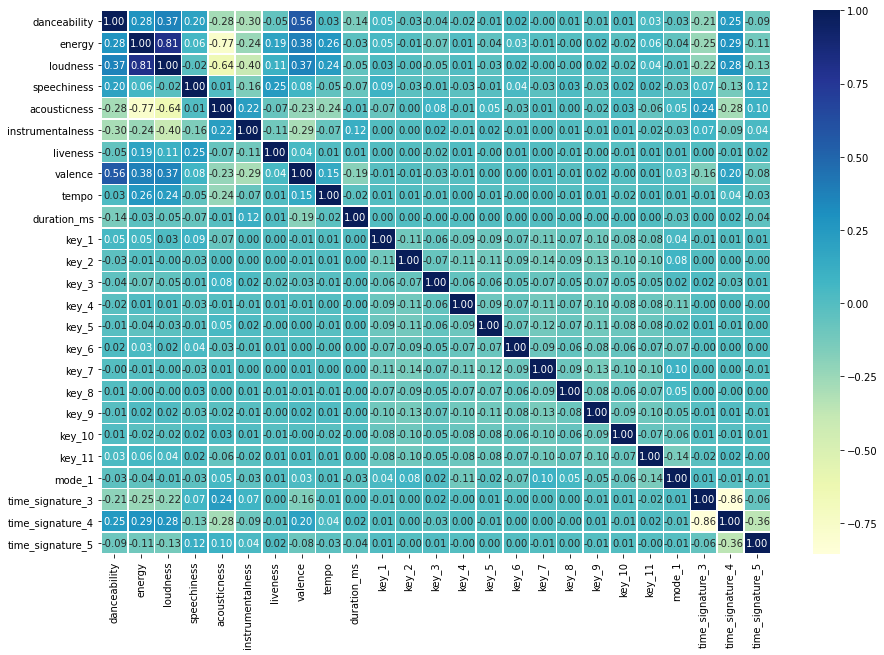

In [272]:
corr_matrix = sample_cat.corr() 
plt.figure(figsize=(15, 10)) 
sns.heatmap(corr_matrix,
            annot=True,              
            linewidths=0.5,              
            fmt= ".2f",              
            cmap="YlGnBu"); 

* Seems like there is no multi-collinearity issue, except energy which correlated with to a great degree with loudness and acousticness. We will attempt to remove 'energy' and re-examine the model

In [273]:
valence_model2 = smf.ols('valence~ danceability + loudness + mode_1 + speechiness + acousticness \
                                + instrumentalness + liveness + tempo + duration_ms \
                                + key_1 + key_2 + key_3 + key_4 + key_5 + key_6 + key_7 + key_8 + key_9 \
                                + key_10 + key_11 + time_signature_3 + time_signature_4 + time_signature_5'
                              , data=sample_cat) 
valence_res2 = valence_model2.fit()
valence_res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     6641.
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        22:49:33   Log-Likelihood:                 30373.
No. Observations:              250000   AIC:                        -6.070e+04
Df Residuals:                  249976   BIC:                        -6.045e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0661      0.005     13.563      0.000       0.057       0.076
danceability         0.7108      0.003    263.416      0.000       0.706       0.716
loudness             0.0059   9.58e-05     61.120      0.000       0.006       0.006
mode_1               0.0223      0.001     23.708      0.000       0.020       0.024
speechiness         -0.0671      0.003    -21.781      0.000      -0.073      -0.061
acousticness         0.0309      0.002     20.131      0.000       0.028       0.034
instrumentalness    -0.0621      0.001    -45.228      0.000      -0.065      -0.059
liveness             0.0868      0.002     35.462      0.000       0.082       0.092
tempo                0.0009   1.47e-05     60.388      0.000       0.001       0.001
duration_ms      -1.854e-07   2.84e-09    -65.252      0.000   -1.91e-07    -1.8e-07
key_1               -0.0367      0.002    -18.734      0.000      -0.041      -0.033
key_2                0.0014      0.002      0.797      0.426      -0.002       0.005
key_3               -0.0051      0.003     -1.953      0.051      -0.010     1.8e-05
key_4               -0.0028      0.002     -1.421      0.155      -0.007       0.001
key_5                0.0096      0.002      5.018      0.000       0.006       0.013
key_6               -0.0070      0.002     -3.134      0.002      -0.011      -0.003
key_7                0.0058      0.002      3.389      0.001       0.002       0.009
key_8               -0.0129      0.002     -5.898      0.000      -0.017      -0.009
key_9                0.0143      0.002      7.964      0.000       0.011       0.018
key_10            6.975e-05      0.002      0.033      0.973      -0.004       0.004
key_11              -0.0033      0.002     -1.596      0.111      -0.007       0.001
time_signature_3    -0.0143      0.004     -3.730      0.000      -0.022      -0.007
time_signature_4     0.0137      0.004      3.703      0.000       0.006       0.021
time_signature_5    -0.0235      0.005     -5.166      0.000      -0.032      -0.015
==============================================================================
Omnibus:                     2145.176   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1466.905
Skew:                           0.055   Prob(JB):                         0.00
Kurtosis:                       2.642   Cond. No.                     5.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* We will reexamine the multi-collinearity of the explanatory variables.

In [274]:
energy_drop = sample_regr.drop(['energy'], axis = 1)
X = add_constant(energy_drop.iloc[:, 0:-1])
pd.Series([variance_inflation_factor(X.values, i) for i in range(X.shape[1])],
          index=X.columns)

const               129.157069
danceability          1.360318
loudness              2.082750
mode_1                1.081072
speechiness           1.219405
acousticness          1.794455
instrumentalness      1.275722
liveness              1.114258
tempo                 1.084104
duration_ms           1.038651
key_1                 1.538582
key_2                 1.717156
key_3                 1.239038
key_4                 1.552685
key_5                 1.559889
key_6                 1.385334
key_7                 1.763378
key_8                 1.372320
key_9                 1.696223
key_10                1.449294
key_11                1.500827
time_signature_3      8.767224
time_signature_4     10.225309
time_signature_5      2.673111
dtype: float64

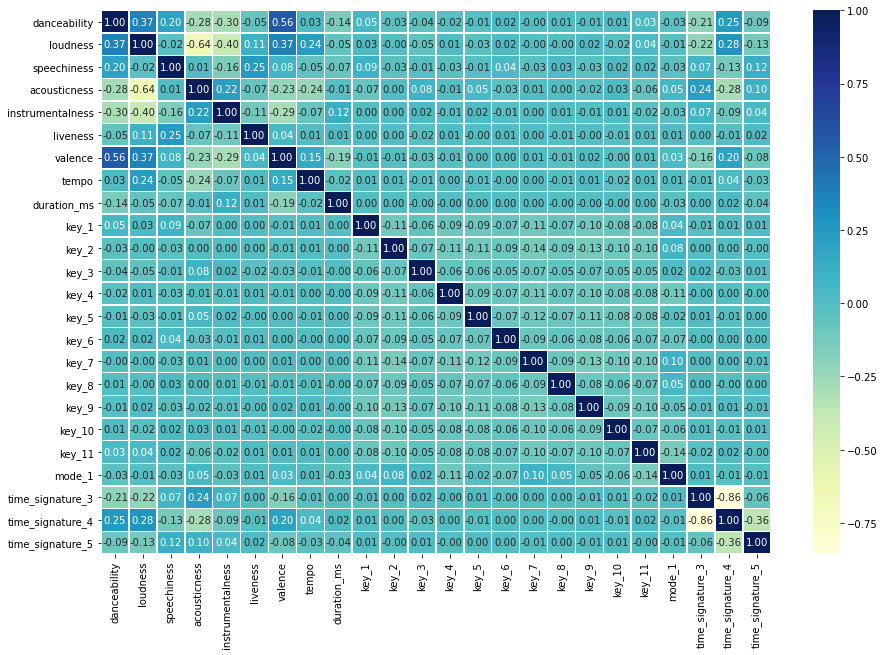

In [275]:
corr_matrix = sample_cat.drop('energy',axis = 1).corr() 
plt.figure(figsize=(15, 10)) 
sns.heatmap(corr_matrix,
            annot=True,              
            linewidths=0.5,              
            fmt= ".2f",              
            cmap="YlGnBu"); 

* Multi-collinearity issue seems to be fixed. Next, we will examine normality. 

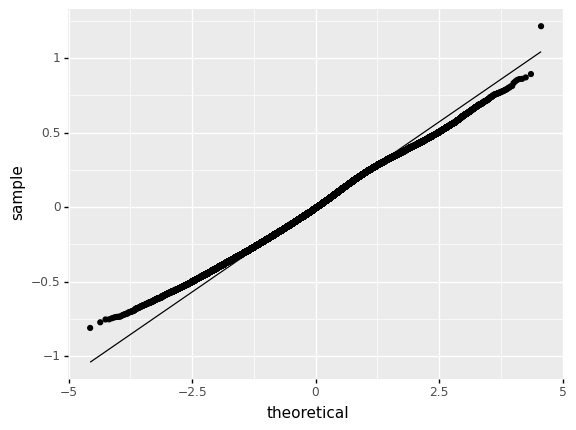

<ggplot: (135627442484)>

In [276]:
ggplot(data=valence_res2.resid.to_frame().rename(columns={0: 'resid'})) +\
    geom_qq(mapping=aes(sample='resid')) +\
    geom_qq_line(mapping=aes(sample='resid'))

Seems like the model's residuals are not normal since they are not following the theoritical normal line. It is possible that the residual's normality could fix by using log in the model's response, or by implementing different transformations.

* Next we will examine the linearty and homoscedasticity of the model

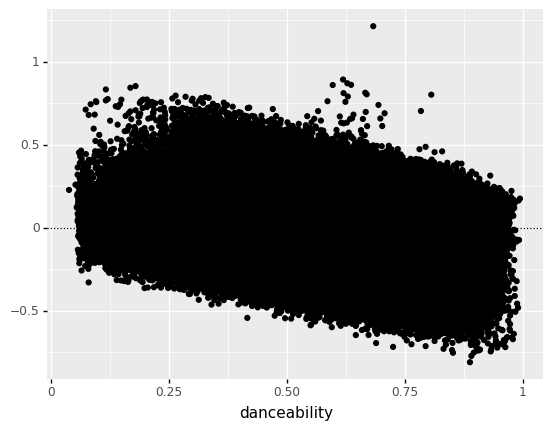

<ggplot: (135531839808)>

In [277]:
ggplot(data = energy_drop) +\
    geom_hline(yintercept=0, color='black', linetype='dotted') +\
    geom_point(mapping=aes(x='danceability', y=valence_res2.resid))

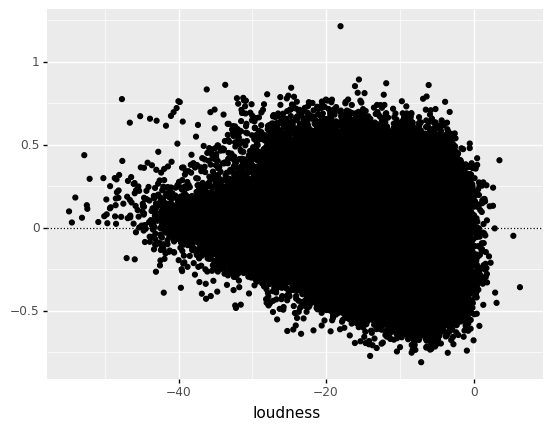

<ggplot: (135546778347)>

In [278]:
ggplot(data = energy_drop) +\
    geom_hline(yintercept=0, color='black', linetype='dotted') +\
    geom_point(mapping=aes(x='loudness', y=valence_res2.resid))

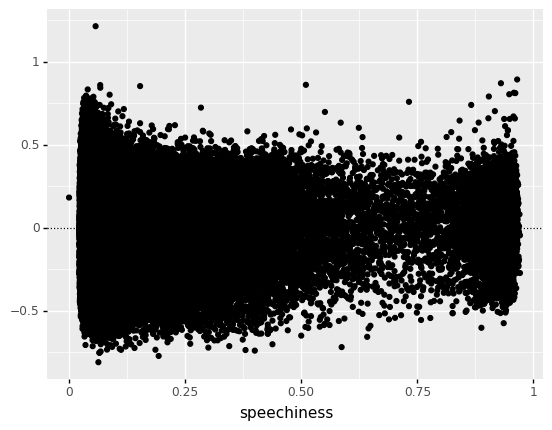

<ggplot: (135456661932)>

In [279]:
ggplot(data = energy_drop) +\
    geom_hline(yintercept=0, color='black', linetype='dotted') +\
    geom_point(mapping=aes(x='speechiness', y=valence_res2.resid))

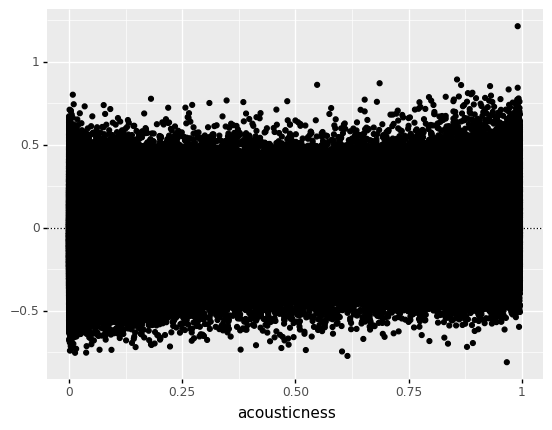

<ggplot: (135546782052)>

In [280]:
ggplot(data = energy_drop) +\
    geom_hline(yintercept=0, color='black', linetype='dotted') +\
    geom_point(mapping=aes(x='acousticness', y=valence_res2.resid))

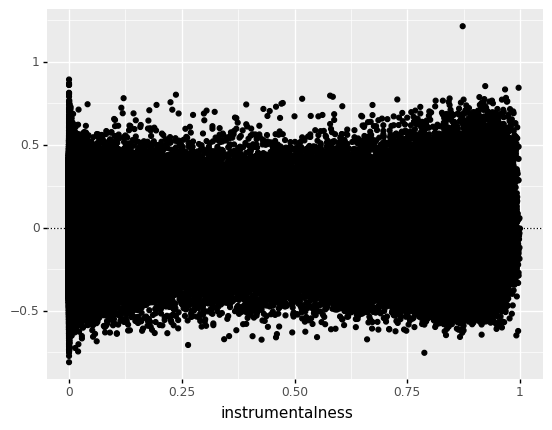

<ggplot: (135619319802)>

In [281]:
ggplot(data = energy_drop) +\
    geom_hline(yintercept=0, color='black', linetype='dotted') +\
    geom_point(mapping=aes(x='instrumentalness', y=valence_res2.resid))

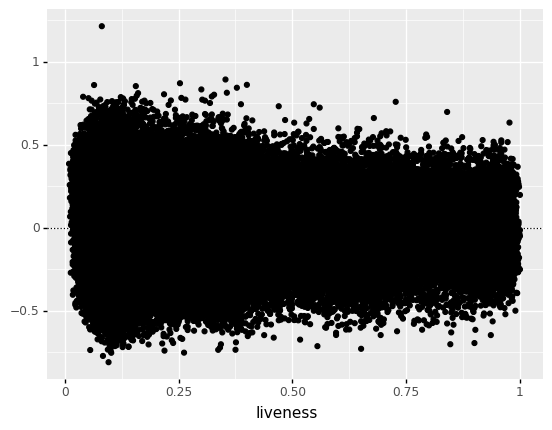

<ggplot: (135788007334)>

In [282]:
ggplot(data = energy_drop) +\
    geom_hline(yintercept=0, color='black', linetype='dotted') +\
    geom_point(mapping=aes(x='liveness', y=valence_res2.resid))

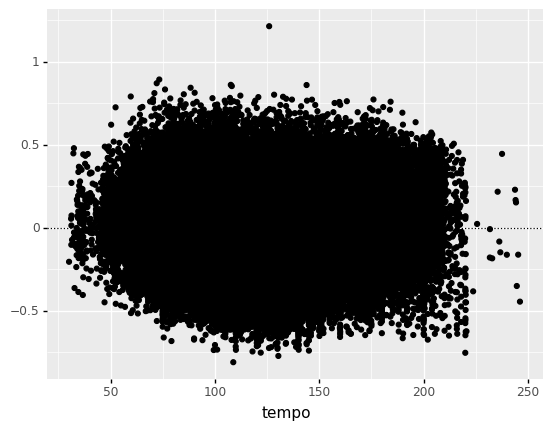

<ggplot: (135546776649)>

In [283]:
ggplot(data = energy_drop) +\
    geom_hline(yintercept=0, color='black', linetype='dotted') +\
    geom_point(mapping=aes(x='tempo', y=valence_res2.resid))

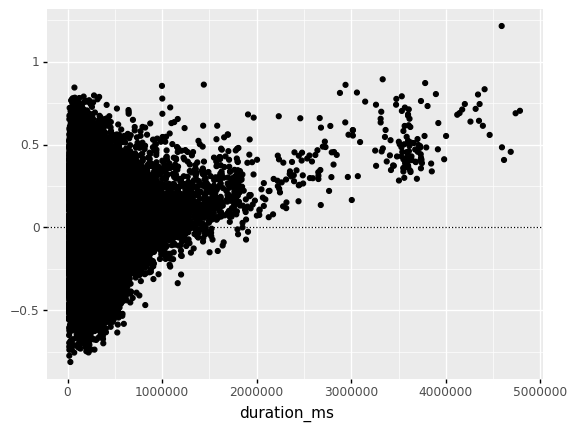

<ggplot: (135635875804)>

In [284]:
ggplot(data = energy_drop) +\
    geom_hline(yintercept=0, color='black', linetype='dotted') +\
    geom_point(mapping=aes(x='duration_ms', y=valence_res2.resid))

* In most cases there doesn't seem to exist any homoscedasticity and linearity issue. Exception to the above constitute the 'duration_ms' which violates both assumptions, 'loudness' which seems to violate homoscedasticity and danceability, which seems to violate linearity

* Following, we will conduct an anova test to compare the final model with the null model, to identify whether they have the same inferential capabilities. It seems that the final model has better inferential capabilities on valence compared to the constant model

In [285]:
anova_table = sm.stats.anova_lm(valence_res2)
anova_table

,df,sum_sq,mean_sq,F,PR(>F)
danceability,1.0,5784.740759,5784.740759,125962.868024,0.000000e+00
loudness,1.0,555.715905,555.715905,12100.727086,0.000000e+00
mode_1,1.0,43.744866,43.744866,952.545498,9.190407e-209
speechiness,1.0,6.419641,6.419641,139.787846,3.021428e-32
acousticness,1.0,16.423539,16.423539,357.622947,1.054366e-79
instrumentalness,1.0,124.331169,124.331169,2707.314167,0.000000e+00
liveness,1.0,54.530057,54.530057,1187.393301,1.369514e-259
tempo,1.0,174.403225,174.403225,3797.634376,0.000000e+00
duration_ms,1.0,191.643116,191.643116,4173.033433,0.000000e+00
key_1,1.0,26.774686,26.774686,583.019418,1.162013e-128


In [286]:
valence_res2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                valence   R-squared:                       0.379
Model:                            OLS   Adj. R-squared:                  0.379
Method:                 Least Squares   F-statistic:                     6641.
Date:                Fri, 04 Mar 2022   Prob (F-statistic):               0.00
Time:                        22:53:40   Log-Likelihood:                 30373.
No. Observations:              250000   AIC:                        -6.070e+04
Df Residuals:                  249976   BIC:                        -6.045e+04
Df Model:                          23                                         
Covariance Type:            nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.0661      0.005     13.563      0.000       0.057       0.076
danceability         0.7108      0.003    263.416      0.000       0.706       0.716
loudness             0.0059   9.58e-05     61.120      0.000       0.006       0.006
mode_1               0.0223      0.001     23.708      0.000       0.020       0.024
speechiness         -0.0671      0.003    -21.781      0.000      -0.073      -0.061
acousticness         0.0309      0.002     20.131      0.000       0.028       0.034
instrumentalness    -0.0621      0.001    -45.228      0.000      -0.065      -0.059
liveness             0.0868      0.002     35.462      0.000       0.082       0.092
tempo                0.0009   1.47e-05     60.388      0.000       0.001       0.001
duration_ms      -1.854e-07   2.84e-09    -65.252      0.000   -1.91e-07    -1.8e-07
key_1               -0.0367      0.002    -18.734      0.000      -0.041      -0.033
key_2                0.0014      0.002      0.797      0.426      -0.002       0.005
key_3               -0.0051      0.003     -1.953      0.051      -0.010     1.8e-05
key_4               -0.0028      0.002     -1.421      0.155      -0.007       0.001
key_5                0.0096      0.002      5.018      0.000       0.006       0.013
key_6               -0.0070      0.002     -3.134      0.002      -0.011      -0.003
key_7                0.0058      0.002      3.389      0.001       0.002       0.009
key_8               -0.0129      0.002     -5.898      0.000      -0.017      -0.009
key_9                0.0143      0.002      7.964      0.000       0.011       0.018
key_10            6.975e-05      0.002      0.033      0.973      -0.004       0.004
key_11              -0.0033      0.002     -1.596      0.111      -0.007       0.001
time_signature_3    -0.0143      0.004     -3.730      0.000      -0.022      -0.007
time_signature_4     0.0137      0.004      3.703      0.000       0.006       0.021
time_signature_5    -0.0235      0.005     -5.166      0.000      -0.032      -0.015
==============================================================================
Omnibus:                     2145.176   Durbin-Watson:                   2.000
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1466.905
Skew:                           0.055   Prob(JB):                         0.00
Kurtosis:                       2.642   Cond. No.                     5.12e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 5.12e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

* The final model can be explained from the following formula:

   $$ valence = 0.066 + 0.71 x danceability + 0.006 x loudness + 0.02 x mode_1 - 0.067 x speechiness + 0.03 x acousticness - 0.06 x instrumentalness + 0.087 x liveness + 0.0009 x tempo - 0.0000002 x duration_ms - 0.036 x key_1 - 0.001 x key_2 - 0.005 x key_3 - 0.003 x key_4 + 0.009 x key_5 - 0.007 x key_6 + 0.0058 x key_7 - 0.01 x key_8 + 0.01 x key_9 - 0.001 x key_10 - 0.00007 x key_11 - 0.001 x time_signature_3 + 0.01 x time_signature_4 - 0.02 x time_signature_5 + ε $$

For every hypothesis test, a threshold of a=5% statistical significance will be held. 
* Regarding the numeric variables, it is observed that danceability, loudness, acousticness, liveness and tempo have a positive effect for the valence and have a statistically significant effect in the valence value, since p-value = 0 < a. In other words, when each one of the mentioned variables increase by one unit while the rest of the variables remain unchanged the valence increases.
* On the other hand, speechiness, instrumentalness, track's duration have the opposite effect on valence (and they also have a statistically significant effect in the valence value). As a result, while each one of those values increase while the rest remain unchanged, the valence's value decreases.
* Regarding the track's modes, it seems that in average tracks that have a mode equal to 1 (major) tend to have slightly vigher values in comparison to those that have a mode equal to 0 (minor) with the rest variables unchanged. Mode also has a statistically significant effect in the valence value.
* Regarding the track's keys, it is noticed that in average tracks with keys 5, 7 and 9 tend to have slightly higher valence in comparison to tracks with key 0, with the rest of the variables unchanged. On the other hand, tracks with keys 1, 6 and 8 tend to have lower valence values in comparison to tracks with key 0, with the rest of the variables unchanged. Keys 1, 5, 6, 7, 8 and 9 all have a statistically significant effect in the valence value.
* Tracks with key values 2, 3, 4, 10 and 11 all have statistically insignificant effect in the valence value. As a result, their effect in valence in comparison to that of tracks with key value 0 is considered equal to zero.
* Tracks with a time_signature equal to 4 in average have a slightly greater valence value in comparison to tracks with a time_signature equal to 3. The opposite can be deducted for tracks with a time_signature equal to 3 or 5, tracks with wich tend to have a lower valence value in comparison to tracks with a time_signature equal to 3. All time signature levels (3, 4 and 5) have a statistically significant effect in the valence value.

In [287]:
#calculation of R-Squared value
valence_res2.rsquared

0.37928361728800086

* R-Squared value dropped from 43% to 38% from removing energy variable

# ML Prediction Algorithms

Next, three methods of machine learning will be implemented to predict valence values

Since we intent to apply classification methods, we will create five valence classes based on the valence values, with a python process

In [202]:
def valence_cat(row):
    if row['valence'] >= 0 and row['valence'] < 0.25:
        val = '0' #melanholic
    elif row['valence'] >= 0.25 and row['valence'] < 0.5:
        val = '1' #sad
    elif row['valence'] >= 0.5 and row['valence'] < 0.75:
        val = '2' #happy
    else:
        val = '3' #enthusiastic
    return val

In [203]:
#we create a new dataframe based on the previous one. We will use that to implement the ML algorithms.
ML_Spotify = sample_cat
ML_Spotify['valence_cat'] = ML_Spotify.apply(valence_cat, axis=1)
ML_Spotify

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,...,key_7,key_8,key_9,key_10,key_11,mode_1,time_signature_3,time_signature_4,time_signature_5,valence_cat
889371,0.299,0.04880,-19.656,0.0437,0.94500,0.000369,0.1710,0.2260,116.756,431200.0,...,0,0,0,1,0,1,0,1,0,0
1342531,0.709,0.83100,-1.613,0.0518,0.00423,0.000000,0.0592,0.7410,99.984,255454.0,...,0,0,0,0,0,1,0,1,0,2
1932744,0.269,0.00229,-39.158,0.0372,0.98600,0.868000,0.1740,0.0882,69.659,312813.0,...,0,0,0,0,0,1,1,0,0,0
113513,0.741,0.91900,-2.342,0.2540,0.31000,0.000000,0.4120,0.6660,115.054,208880.0,...,0,0,0,0,0,1,0,1,0,2
1953463,0.589,0.48300,-8.920,0.0294,0.62800,0.663000,0.2350,0.3280,143.973,384015.0,...,0,0,1,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895299,0.193,0.48300,-8.217,0.0399,0.56600,0.805000,0.7290,0.0729,177.730,294227.0,...,0,0,0,0,0,0,0,1,0,0
1642791,0.523,0.23100,-17.878,0.6900,0.97600,0.167000,0.6920,0.4620,80.841,1423600.0,...,0,0,0,0,0,1,0,1,0,1
250318,0.675,0.28100,-9.319,0.0293,0.40700,0.000124,0.1140,0.2030,91.985,301681.0,...,1,0,0,0,0,1,0,1,0,0
1404734,0.751,0.29500,-12.736,0.5020,0.98800,0.000000,0.4170,0.9390,113.726,38592.0,...,0,0,0,0,0,0,0,1,0,3


In [204]:
#we create a variable that only contains the features, and one that contains the targets
from sklearn.preprocessing import LabelEncoder,MinMaxScaler
from sklearn.model_selection import train_test_split

X = ML_Spotify.drop(['valence', 'valence_cat'], axis = 1)
Y = ML_Spotify.valence_cat
print(X.shape, Y.shape)

(250000, 24) (250000,)


In [205]:
#we divide the dataframes to train and test
X_train, X_test, Y_train, Y_test = train_test_split(X, Y,
                                                    test_size=0.2,
                                                    random_state=10, shuffle = True)

## 1st ML Algorithm

We create a pipeline that scales the data, uses a PCA process with 2 components and then applies Gaussian Naive Bayes algorithm 

In [206]:
from sklearn.pipeline import make_pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn import metrics

X_Scaled = X
Y_Scaled = Y
scaler = StandardScaler()
scaler.fit(X_Scaled[['danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'tempo', 'duration_ms']])
X_Scaled[['danceability', 'energy', 'loudness', 'speechiness',
       'acousticness', 'instrumentalness', 'liveness', 'tempo', 'duration_ms']] = scaler.transform(X_Scaled[['danceability'
                                                                                , 'energy', 'loudness', 'speechiness',
                                                                                'acousticness', 'instrumentalness', 'liveness'
                                                                                , 'tempo', 'duration_ms']])

X_Scaled

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,tempo,duration_ms,key_1,...,key_6,key_7,key_8,key_9,key_10,key_11,mode_1,time_signature_3,time_signature_4,time_signature_5
889371,-1.202824,-1.697018,-1.324582,-0.350896,1.354629,-0.638186,-0.199097,-0.056725,1.224421,0,...,0,0,0,0,1,0,1,0,1,0
1342531,1.010392,1.072700,1.471378,-0.298153,-1.164062,-0.639232,-0.803798,-0.607364,0.081488,1,...,0,0,0,0,0,0,1,0,1,0
1932744,-1.364767,-1.861707,-4.346631,-0.393221,1.464396,1.821974,-0.182870,-1.602960,0.454512,1,...,0,0,0,0,0,0,1,1,0,0
113513,1.183131,1.384303,1.358412,1.018472,-0.345434,-0.639232,1.104419,-0.112603,-0.221397,0,...,0,0,0,0,0,0,1,0,1,0
1953463,0.362621,-0.159544,0.339079,-0.444011,0.505936,1.240699,0.147065,0.836832,0.917562,0,...,0,0,0,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
895299,-1.775022,-0.159544,0.448016,-0.375640,0.339945,1.643338,2.819002,1.945104,0.333642,0,...,0,0,0,0,0,0,0,0,1,0
1642791,0.006347,-1.051860,-1.049062,3.857487,1.437624,-0.165705,2.618878,-1.235845,7.678315,0,...,1,0,0,0,0,0,1,0,1,0
250318,0.826857,-0.874813,0.277249,-0.444662,-0.085740,-0.638881,-0.507397,-0.869978,0.382117,0,...,0,1,0,0,0,0,1,0,1,0
1404734,1.237112,-0.825240,-0.252252,2.633325,1.469751,-0.639232,1.131463,-0.156203,-1.328835,0,...,0,0,0,0,0,0,0,0,1,0


In [207]:
#we divide the dataframes to scaled train and scaled test
X_train_scaled, X_test_scaled, Y_train_scaled, Y_test_scaled = train_test_split(X_Scaled, Y_Scaled,
                                                    test_size=0.2,
                                                    random_state=10, shuffle = True)

[0.28988366 0.13149173 0.11054465 0.09194432 0.08014578 0.07457536
 0.05488139 0.03242975 0.02225499 0.01888561 0.01269097 0.01180994
 0.01069129 0.00950926 0.00805811 0.00757661 0.00696181 0.00647044
 0.0056674  0.00527419 0.00349811 0.00341909 0.00092325 0.00041229]
1.0


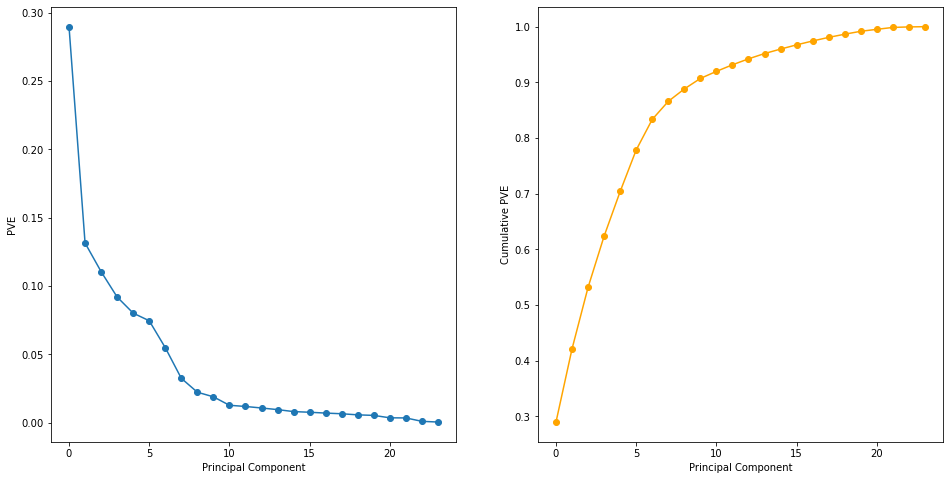

In [208]:
n_components = 24

pca = PCA(n_components=n_components)
pca.fit(X_train_scaled)
print(pca.explained_variance_ratio_)
print(pca.explained_variance_ratio_.sum())

plt.figure(figsize=(16, 8))
plt.subplot(1, 2, 1)
plt.plot(pca.explained_variance_ratio_, marker='o')
plt.xlabel('Principal Component')
plt.ylabel('PVE')
plt.subplot(1, 2, 2)
plt.plot(np.cumsum(pca.explained_variance_ratio_), marker='o', color='orange')
plt.xlabel('Principal Component')
_ = plt.ylabel('Cumulative PVE')

We'll go with 8 principal components, that explain at least 87% of the variance cumulatively

In [209]:
std_clf = make_pipeline(PCA(n_components=8), GaussianNB())
std_clf.fit(X_train_scaled, Y_train_scaled)
pred_test_std = std_clf.predict(X_test_scaled)

print(f'Prediction accuracy: {metrics.accuracy_score(Y_test_scaled, pred_test_std):.2%}')

Prediction accuracy: 42.90%


It is noticed that for scaled data the algorithm's accuracy for out-of-sample data is almost 32%. Below we can see the full summary of the algorithm's performance

In [210]:
from sklearn.metrics import classification_report

print(classification_report(Y_test_scaled, pred_test_std))

              precision    recall  f1-score   support

           0       0.62      0.58      0.60     13454
           1       0.39      0.29      0.33     14013
           2       0.35      0.28      0.31     13106
           3       0.36      0.63      0.46      9427

    accuracy                           0.43     50000
   macro avg       0.43      0.44      0.42     50000
weighted avg       0.43      0.43      0.42     50000



The model has an average score of 43%. It is observed that the model predicts most efficiently tracks that belong to category 0 (melanholic), while it is having a hard time predicting tracks that belong to category 2 (happy)

In [211]:
metrics.confusion_matrix(Y_test, pred_test_std)

array([[7851, 2710, 1655, 1238],
       [3029, 3999, 3291, 3694],
       [1287, 2658, 3706, 5455],
       [ 581, 1009, 1941, 5896]], dtype=int64)

* Finally, we detect the importance of each feature in the above process

In [336]:
from sklearn.inspection import permutation_importance

imps = permutation_importance(std_clf, X_train_scaled, Y_train_scaled)
print(imps.importances_mean)

[ 7.4794e-02  1.3679e-02  1.3801e-02  1.1516e-02  1.4581e-02  1.4199e-02
  1.8110e-03 -1.1180e-03  6.2110e-03 -1.7000e-05 -5.2000e-05 -6.0000e-06
 -1.0000e-06 -3.8000e-05  5.5000e-05  1.6000e-05  2.6000e-05  8.4000e-05
  3.4000e-05  8.0000e-06  1.9400e-04 -6.4000e-05  2.2000e-05  4.5000e-05]


In [337]:
colnames = X.columns
features_imp = dict(zip(colnames, imps.importances_mean))
features_imp = dict(sorted(features_imp.items(), key=lambda item: abs(item[1]), reverse = True))
print('Features Importance')
i=1
for key, value in features_imp.items():
    print(i, '-', key, value)
    i +=1

Features Importance
1 - danceability 0.074794
2 - acousticness 0.014581000000000021
3 - instrumentalness 0.014199000000000017
4 - loudness 0.013801000000000018
5 - energy 0.01367900000000002
6 - speechiness 0.011516000000000016
7 - duration_ms 0.006211000000000011
8 - liveness 0.001811000000000018
9 - tempo -0.0011179999999999968
10 - mode_1 0.00019400000000000528
11 - key_9 8.40000000000063e-05
12 - time_signature_3 -6.39999999999863e-05
13 - key_6 5.5000000000005043e-05
14 - key_2 -5.200000000000759e-05
15 - time_signature_5 4.499999999999504e-05
16 - key_5 -3.799999999999359e-05
17 - key_10 3.40000000000118e-05
18 - key_8 2.60000000000149e-05
19 - time_signature_4 2.1999999999999796e-05
20 - key_1 -1.6999999999989246e-05
21 - key_7 1.6000000000016e-05
22 - key_11 8.000000000008e-06
23 - key_3 -5.999999999983796e-06
24 - key_4 -9.999999999843468e-07


It is observed that the most important feature is danceability, while the least important ones seem to be the key and the time_signature levels

## 2nd ML Algortithm

Next, we will apply a Decision Tree Regressor.

In [212]:
X_Tree = ML_Spotify.drop(['valence','valence_cat'], axis = 1)
Y_Tree = ML_Spotify.valence
print(X_Tree.shape, Y_Tree.shape)

(250000, 24) (250000,)


In [213]:
#we divide the dataframes to train and test
X_train_Tree, X_test_Tree, Y_train_Tree, Y_test_Tree = train_test_split(X_Tree, Y_Tree,
                                                    test_size=0.2,
                                                    random_state=10, shuffle = True)

In [33]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score, KFold
from sklearn.tree import DecisionTreeRegressor

parameters = [
  {'max_depth': list(range(1, 16))},
 ]

cv = KFold(n_splits=5, shuffle=True, random_state=17)
clf_grid = GridSearchCV(DecisionTreeRegressor(), parameters, cv=cv)

clf_grid = clf_grid.fit(X_train_Tree, Y_train_Tree)
print(clf_grid.best_estimator_)
print(clf_grid.best_params_)

DecisionTreeRegressor(max_depth=10)
{'max_depth': 10}


In [214]:
#import of libraries
from sklearn import tree
from sklearn.tree import DecisionTreeRegressor

clf_tree = DecisionTreeRegressor(max_depth=10)
clf_tree.fit(X_train_Tree, Y_train_Tree)
Y_pred_Tree = clf_tree.predict(X_test_Tree)

In [215]:
from sklearn.metrics import mean_absolute_error as mae

print('Mean Average Error:', round(mae(Y_test_Tree, Y_pred_Tree),2))

Mean Average Error: 0.16


The model's mean average error for valence predictions are equal to 0.16. Following, we the model's features' importances will be identified.

In [305]:
clf_tree.feature_importances_

array([5.76674529e-01, 1.93862671e-01, 1.06690027e-02, 4.10134213e-02,
       4.33222891e-02, 2.36196064e-02, 1.54331557e-02, 2.48285492e-02,
       6.87093000e-02, 2.22441463e-04, 2.83536968e-05, 4.51498749e-05,
       9.73463659e-05, 6.99793386e-05, 2.88745886e-05, 3.85232506e-05,
       1.28302871e-04, 0.00000000e+00, 4.91282161e-06, 1.24568877e-04,
       8.41179647e-04, 1.05011896e-04, 9.46192549e-05, 3.82117259e-05])

In [306]:
colnames = X.columns
features_imp2 = dict(zip(colnames, clf_tree.feature_importances_))
features_imp2 = dict(sorted(features_imp2.items(), key=lambda item: abs(item[1]), reverse = True))
print('Features Importance')
i=1
for key, value in features_imp2.items():
    print(i, '-', key, value)
    i +=1

Features Importance
1 - danceability 0.5766745287359502
2 - energy 0.19386267120968417
3 - duration_ms 0.0687092999526978
4 - acousticness 0.04332228910643157
5 - speechiness 0.04101342130053745
6 - tempo 0.024828549160519676
7 - instrumentalness 0.02361960643802899
8 - liveness 0.015433155729274495
9 - loudness 0.010669002693799851
10 - mode_1 0.0008411796469639624
11 - key_1 0.00022244146343605012
12 - key_8 0.00012830287111705483
13 - key_11 0.00012456887732178093
14 - time_signature_3 0.00010501189637301934
15 - key_4 9.73463659427523e-05
16 - time_signature_4 9.461925493117502e-05
17 - key_5 6.997933856598978e-05
18 - key_3 4.514987489377605e-05
19 - key_7 3.852325055211897e-05
20 - time_signature_5 3.821172593016859e-05
21 - key_6 2.887458858748154e-05
22 - key_2 2.835369684624203e-05
23 - key_10 4.912821614133686e-06
24 - key_9 0.0


* Again, the most important feature in the above process was danceability, while the least important features were all the levels of key and time_signature variables

## 3rd ML Algortithm

Next, we will apply a Stohastic Gradient Descent Classifier. 

In [321]:
from sklearn.linear_model import SGDClassifier

clf_SGD = SGDClassifier(alpha=0.001, max_iter=1e4, tol=-np.inf, random_state=19, loss = 'log')
clf_SGD.fit(X_train_scaled, Y_train_scaled)
Y_pred_SGD = clf_SGD.predict(X_test_scaled)

In [322]:
print(classification_report(Y_test_scaled, Y_pred_SGD))

              precision    recall  f1-score   support

           0       0.58      0.69      0.63     13454
           1       0.41      0.34      0.37     14013
           2       0.39      0.39      0.39     13106
           3       0.51      0.50      0.51      9427

    accuracy                           0.48     50000
   macro avg       0.47      0.48      0.47     50000
weighted avg       0.47      0.48      0.47     50000



Αverage score is 48%. The model predicts most efficiently tracks that belong to category 0 (melanholic) category, while it predicts the worst songs that belong to category 1 (sad). In fact, this model is the most effective compared to the rest in predicting the valence category of each track.

In [323]:
metrics.confusion_matrix(Y_test_scaled, Y_pred_SGD)

array([[9325, 2362, 1347,  420],
       [4442, 4726, 3590, 1255],
       [1791, 3258, 5129, 2928],
       [ 524, 1044, 3119, 4740]], dtype=int64)

* Finally, we will identify the importance of each feature

In [324]:
from sklearn.inspection import permutation_importance

imps = permutation_importance(clf_SGD, X_train_scaled, Y_train_scaled)
print(imps.importances_mean)

[ 1.32702e-01  1.08510e-01  2.63610e-02  1.17900e-02  3.84670e-02
  1.28850e-02  2.70200e-03  7.11300e-03  1.37740e-02  1.06100e-03
  6.90000e-05  6.30000e-05 -5.10000e-05 -9.00000e-05 -6.70000e-05
  7.10000e-05  2.15000e-04  1.02000e-04  5.90000e-05  6.90000e-05
  1.60000e-03  4.66000e-04  1.20000e-04  9.00000e-06]


In [325]:
colnames = X.columns
features_imp3 = dict(zip(colnames, imps.importances_mean))
features_imp3 = dict(sorted(features_imp3.items(), key=lambda item: abs(item[1]), reverse = True))
print('Features Importance')
i=1
for key, value in features_imp3.items():
    print(i, '-', key, value)
    i +=1

Features Importance
1 - danceability 0.13270200000000004
2 - energy 0.10851000000000002
3 - acousticness 0.03846700000000003
4 - loudness 0.026361000000000034
5 - duration_ms 0.013774000000000031
6 - instrumentalness 0.012885000000000025
7 - speechiness 0.011790000000000033
8 - tempo 0.007113000000000025
9 - liveness 0.0027020000000000264
10 - mode_1 0.0016000000000000237
11 - key_1 0.0010610000000000341
12 - time_signature_3 0.00046600000000003307
13 - key_8 0.00021500000000002073
14 - time_signature_4 0.00012000000000003119
15 - key_9 0.0001020000000000243
16 - key_5 -8.999999999996789e-05
17 - key_7 7.100000000002105e-05
18 - key_2 6.900000000001905e-05
19 - key_11 6.900000000001905e-05
20 - key_6 -6.699999999997264e-05
21 - key_3 6.300000000002415e-05
22 - key_10 5.900000000002015e-05
23 - key_4 -5.099999999997884e-05
24 - time_signature_5 9.000000000025653e-06


* Again, it is observed that the most important feature is danceability, while the least important ones are the levels of key and time_signature variables

## 4th ML Algorithm
Finally, we will implement a Lasso model to predict valence's values

In [216]:
from sklearn import linear_model

clf_lasso = linear_model.Lasso(alpha=0.001)
clf_lasso.fit(X_train_Tree, Y_train_Tree)

Lasso(alpha=0.001)

In [217]:
lasso_pred = clf_lasso.predict(X_test_Tree)
print('Mean Average Error:', round(mae(Y_test_Tree, lasso_pred),2))

Mean Average Error: 0.17


* Lasso predictions have a MAE equal to 0.17

* Again, we will identify the importance of each feature.

In [309]:
print(clf_lasso.coef_)

[ 6.81363063e-01  3.73421380e-01 -2.78009637e-03 -6.10839809e-02
  1.35144135e-01 -8.01836713e-02  0.00000000e+00  7.13520555e-04
 -1.81437969e-07 -2.78927235e-02  0.00000000e+00 -0.00000000e+00
 -0.00000000e+00  2.57219191e-04 -0.00000000e+00  0.00000000e+00
 -0.00000000e+00  2.23343549e-03 -0.00000000e+00 -0.00000000e+00
  2.13242538e-02 -0.00000000e+00  1.09733631e-02 -0.00000000e+00]


In [310]:
colnames = X.columns
features_imp_lasso = dict(zip(colnames, clf_lasso.coef_))
features_imp_lasso = dict(sorted(features_imp_lasso.items(), key=lambda item: abs(item[1]), reverse = True))
print('Features Importance')
i=1
for key, value in features_imp_lasso.items():
    print(i, '-', key, value)
    i +=1

Features Importance
1 - danceability 0.6813630632883905
2 - energy 0.373421379817919
3 - acousticness 0.13514413462366434
4 - instrumentalness -0.08018367131188943
5 - speechiness -0.06108398093487222
6 - key_1 -0.02789272347405616
7 - mode_1 0.021324253811867318
8 - time_signature_4 0.010973363051904966
9 - loudness -0.0027800963739276086
10 - key_9 0.0022334354886868898
11 - tempo 0.0007135205549206731
12 - key_5 0.00025721919139038785
13 - duration_ms -1.8143796941968572e-07
14 - liveness 0.0
15 - key_2 0.0
16 - key_3 -0.0
17 - key_4 -0.0
18 - key_6 -0.0
19 - key_7 0.0
20 - key_8 -0.0
21 - key_10 -0.0
22 - key_11 -0.0
23 - time_signature_3 -0.0
24 - time_signature_5 -0.0


* It is observed that the lasso process kept considered danceability to be the most important feature while it shrinked the liveness, all the key and time_signature levels to zero.

## 5th ML Algorithm
Next, we will predict the valence values uding XGBoost regressor.

In [218]:
import xgboost as xgb
xgb_reg = xgb.XGBRegressor(alpha=0.01, gamma = 0.001, random_state = 12, eval_metric = 'mae'
                           , n_estimators = 250, learning_rate=0.4)
xgb_reg.fit(X_train_Tree, Y_train_Tree)

XGBRegressor(alpha=0.01, base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             eval_metric='mae', gamma=0.001, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.4, max_delta_step=0,
             max_depth=6, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=250, n_jobs=12,
             num_parallel_tree=1, predictor='auto', random_state=12,
             reg_alpha=0.00999999978, reg_lambda=1, scale_pos_weight=1,
             subsample=1, tree_method='exact', validate_parameters=1,
             verbosity=None)

* It has a MAE equal to 0.1421; the best yet.

In [219]:
preds = xgb_reg.predict(X_test_Tree)
print('Mean Average Error:', round(mae(Y_test_Tree, preds),4))

Mean Average Error: 0.1421


<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

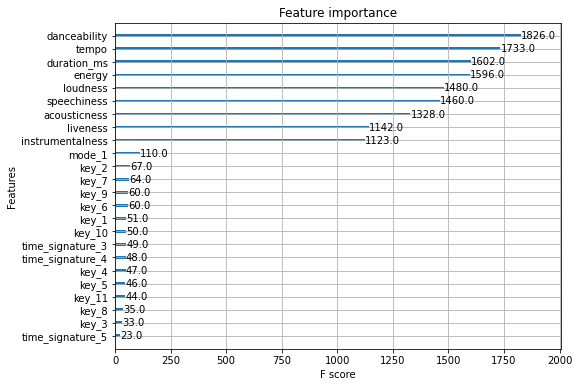

In [220]:
fig = plt.figure(figsize=(8, 6))
xgb.plot_importance(xgb_reg, ax = fig.gca())

* It is observed that the danceability and the tempo were the most important features for this model, while the least important ones are the key and time signature levels of the track.

## 6th ML Model
We will use a LightGBM model to predict valence

In [221]:
import lightgbm as lgb

lgb_reg = lgb.LGBMRegressor(learning_rate=0.3, num_leaves=64, feature_fraction=0.9,verbosity=1)
lgb_reg.fit(X_train_Tree, Y_train_Tree)

[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] feature_fraction is set=0.9, colsample_bytree=1.0 will be ignored. Current value: feature_fraction=0.9
[LightGBM] [Warning] Auto-choosing col-wise multi-threading, the overhead of testing was 0.006746 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2321
[LightGBM] [Info] Number of data points in the train set: 200000, number of used features: 24
[LightGBM] [Info] Start training from score 0.465278


LGBMRegressor(feature_fraction=0.9, learning_rate=0.3, num_leaves=64,
              verbosity=1)

In [222]:
lgbm_preds = lgb_reg.predict(X_test)
print('Mean Average Error:', round(mae(Y_test_Tree, lgbm_preds),4))

Mean Average Error: 0.1413


<AxesSubplot:title={'center':'Feature importance'}, xlabel='Feature importance', ylabel='Features'>

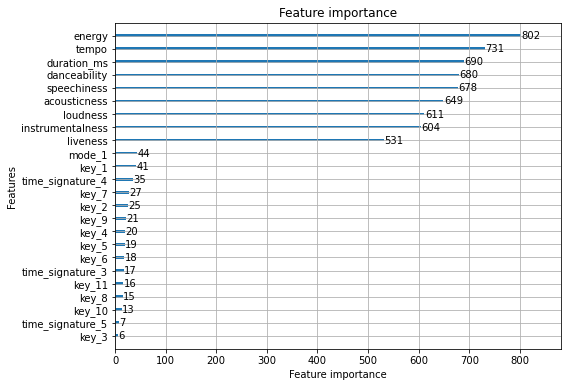

In [223]:
lgb.plot_importance(lgb_reg, figsize=(8, 6))

* The most important features for the valence predictions according to the LightGBM method is the energy and the tempo features, while the least important ones are the key and the time signature levels.

## Summary of the ML Algorithms

* The best ML Algorithm in terms of MAE is the LightGBM with a MAE equal to 0.1413. 
* The best classification predictive algorithm was the Stohastic Gradient Descent, since it had the best f1-score (0.48).

## Οut-of-sample test

Concluding we will conduct an out-of-sample test using the regression tree model.

In [224]:
#We gain access to the Spotify Web API.
from spotipy.oauth2 import SpotifyClientCredentials

client_credentials_manager = SpotifyClientCredentials(client_id = 'e2b2b6d41f3d4465955f8cc6518e1cf5',
                                                      client_secret = 'a6037406e1fd4e69bb7b88123e118550')
sp = spotipy.Spotify(client_credentials_manager=client_credentials_manager)

In [225]:
#We read the text file that contains 1162 song ids
test_ids = pd.read_csv('spotify_ids.txt')
test_ids = (test_ids.T.reset_index().T.reset_index(drop=True)
            .set_axis(['Song_id' for i in range(test_ids.shape[1])], axis=1))

In [226]:
#we assign all the song ids in a list. Then, we will use that list to scrap the features of each track by using their song ids.
features = {}
all_track_ids = list(test_ids['Song_id'].unique())
all_track_ids

['7lPN2DXiMsVn7XUKtOW1CS',
 '5QO79kh1waicV47BqGRL3g',
 '0VjIjW4GlUZAMYd2vXMi3b',
 '4MzXwWMhyBbmu6hOcLVD49',
 '5Kskr9LcNYa0tpt5f0ZEJx',
 '6tDDoYIxWvMLTdKpjFkc1B',
 '3VT8hOC5vuDXBsHrR53WFh',
 '1xK1Gg9SxG8fy2Ya373oqb',
 '6f3Slt0GbA2bPZlz0aIFXN',
 '3tjFYV6RSFtuktYl3ZtYcq',
 '27OeeYzk6klgBh83TSvGMA',
 '2XIc1pqjXV3Cr2BQUGNBck',
 '60ynsPSSKe6O3sfwRnIBRf',
 '1M4OcYkxAtu3ErzSgDEfoi',
 '3YJJjQPAbDT7mGpX3WtQ9A',
 '5nujrmhLynf4yMoMtj8AQF',
 '1t9WgS8FN0534tLBRwbaxO',
 '7vrJn5hDSXRmdXoR30KgF1',
 '4saklk6nie3yiGePpBwUoc',
 '3FAJ6O0NOHQV8Mc5Ri6ENp',
 '0D75ciM842cdUMKSMfAR9y',
 '35mvY5S1H3J2QZyna3TFe0',
 '6Im9k8u9iIzKMrmV7BWtlF',
 '5YYW3yRktprLRr47WK219Y',
 '7hxHWCCAIIxFLCzvDgnQHX',
 '3VvA1wSxukMLsvXoXtlwWx',
 '1diS6nkxMQc3wwC4G1j0bh',
 '6ft4hAq6yde8jPZY2i5zLr',
 '7qEHsqek33rTcFNT9PFqLf',
 '31qCy5ZaophVA81wtlwLc4',
 '3iw6V4LH7yPj1ESORX9RIN',
 '45bE4HXI0AwGZXfZtMp8JR',
 '02MWAaffLxlfxAUY7c5dvx',
 '1tkg4EHVoqnhR6iFEXb60y',
 '5uEYRdEIh9Bo4fpjDd4Na9',
 '6UelLqGlWMcVH1E5c4H7lY',
 '1J14CdDAvBTE1AJYUOwl6C',
 

In [227]:
#We scrap every track's features in batches of 100 tracks
start = 0
num_tracks = 100
while start < len(all_track_ids):
    print(f'getting from {start} to {start+num_tracks}')
    tracks_batch = all_track_ids[start:start+num_tracks]
    features_batch = sp.audio_features(tracks_batch)
    features.update({ track_id : track_features 
                     for track_id, track_features in zip(tracks_batch, features_batch) })
    start += num_tracks

getting from 0 to 100
getting from 100 to 200
getting from 200 to 300
getting from 300 to 400
getting from 400 to 500
getting from 500 to 600
getting from 600 to 700
getting from 700 to 800
getting from 800 to 900
getting from 900 to 1000
getting from 1000 to 1100
getting from 1100 to 1200


In [228]:
#We assign the each track with their features in a dataframe
test_tracks = pd.DataFrame.from_dict(features, orient='index')
test_tracks

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,type,id,uri,track_href,analysis_url,duration_ms,time_signature
7lPN2DXiMsVn7XUKtOW1CS,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,audio_features,7lPN2DXiMsVn7XUKtOW1CS,spotify:track:7lPN2DXiMsVn7XUKtOW1CS,https://api.spotify.com/v1/tracks/7lPN2DXiMsVn...,https://api.spotify.com/v1/audio-analysis/7lPN...,242014,4
5QO79kh1waicV47BqGRL3g,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,audio_features,5QO79kh1waicV47BqGRL3g,spotify:track:5QO79kh1waicV47BqGRL3g,https://api.spotify.com/v1/tracks/5QO79kh1waic...,https://api.spotify.com/v1/audio-analysis/5QO7...,215627,4
0VjIjW4GlUZAMYd2vXMi3b,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,audio_features,0VjIjW4GlUZAMYd2vXMi3b,spotify:track:0VjIjW4GlUZAMYd2vXMi3b,https://api.spotify.com/v1/tracks/0VjIjW4GlUZA...,https://api.spotify.com/v1/audio-analysis/0VjI...,200040,4
4MzXwWMhyBbmu6hOcLVD49,0.731,0.573,4,-10.059,0,0.0544,0.40100,0.000052,0.1130,0.145,109.928,audio_features,4MzXwWMhyBbmu6hOcLVD49,spotify:track:4MzXwWMhyBbmu6hOcLVD49,https://api.spotify.com/v1/tracks/4MzXwWMhyBbm...,https://api.spotify.com/v1/audio-analysis/4MzX...,205090,4
5Kskr9LcNYa0tpt5f0ZEJx,0.907,0.393,4,-7.636,0,0.0539,0.45100,0.000001,0.1350,0.202,104.949,audio_features,5Kskr9LcNYa0tpt5f0ZEJx,spotify:track:5Kskr9LcNYa0tpt5f0ZEJx,https://api.spotify.com/v1/tracks/5Kskr9LcNYa0...,https://api.spotify.com/v1/audio-analysis/5Ksk...,205458,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4lUmnwRybYH7mMzf16xB0y,0.596,0.650,9,-5.167,1,0.3370,0.13800,0.000000,0.1400,0.188,133.997,audio_features,4lUmnwRybYH7mMzf16xB0y,spotify:track:4lUmnwRybYH7mMzf16xB0y,https://api.spotify.com/v1/tracks/4lUmnwRybYH7...,https://api.spotify.com/v1/audio-analysis/4lUm...,257428,4
1fzf9Aad4y1RWrmwosAK5y,0.588,0.850,4,-6.431,1,0.0318,0.16800,0.002020,0.0465,0.768,93.003,audio_features,1fzf9Aad4y1RWrmwosAK5y,spotify:track:1fzf9Aad4y1RWrmwosAK5y,https://api.spotify.com/v1/tracks/1fzf9Aad4y1R...,https://api.spotify.com/v1/audio-analysis/1fzf...,187310,4
3E3pb3qH11iny6TFDJvsg5,0.754,0.660,0,-6.811,1,0.2670,0.17900,0.000000,0.1940,0.316,83.000,audio_features,3E3pb3qH11iny6TFDJvsg5,spotify:track:3E3pb3qH11iny6TFDJvsg5,https://api.spotify.com/v1/tracks/3E3pb3qH11in...,https://api.spotify.com/v1/audio-analysis/3E3p...,209299,4
3yTkoTuiKRGL2VAlQd7xsC,0.584,0.836,0,-4.925,1,0.0790,0.05580,0.000000,0.0663,0.484,104.973,audio_features,3yTkoTuiKRGL2VAlQd7xsC,spotify:track:3yTkoTuiKRGL2VAlQd7xsC,https://api.spotify.com/v1/tracks/3yTkoTuiKRGL...,https://api.spotify.com/v1/audio-analysis/3yTk...,202204,4


In [229]:
#We drop the columns that are not present in the train dataset.
test_tracks = test_tracks.reset_index().rename(columns={'index' : 'song_id'})
test_tracks = test_tracks.drop(['song_id', 'type', 'id', 'uri', 'track_href', 'analysis_url'], axis = 1)
test_tracks = test_tracks.loc[test_tracks.time_signature >= 1]
test_tracks

,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,time_signature
0,0.585,0.436,10,-8.761,1,0.0601,0.72100,0.000013,0.1050,0.132,143.874,242014,4
1,0.680,0.826,0,-5.487,1,0.0309,0.02120,0.000012,0.5430,0.644,118.051,215627,4
2,0.514,0.730,1,-5.934,1,0.0598,0.00146,0.000095,0.0897,0.334,171.005,200040,4
3,0.731,0.573,4,-10.059,0,0.0544,0.40100,0.000052,0.1130,0.145,109.928,205090,4
4,0.907,0.393,4,-7.636,0,0.0539,0.45100,0.000001,0.1350,0.202,104.949,205458,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,0.596,0.650,9,-5.167,1,0.3370,0.13800,0.000000,0.1400,0.188,133.997,257428,4
1158,0.588,0.850,4,-6.431,1,0.0318,0.16800,0.002020,0.0465,0.768,93.003,187310,4
1159,0.754,0.660,0,-6.811,1,0.2670,0.17900,0.000000,0.1940,0.316,83.000,209299,4
1160,0.584,0.836,0,-4.925,1,0.0790,0.05580,0.000000,0.0663,0.484,104.973,202204,4


In [230]:
#the key, mode and time_signature variables have to be transformed to dummy variables, since they are supposed to be categorical
for col in ['key', 'mode', 'time_signature']:
    test_tracks[col] = test_tracks[col].astype('int')
    test_tracks[col] = test_tracks[col].astype('category')

test_tracks = pd.get_dummies(test_tracks, drop_first=True)
test_tracks

,danceability,energy,loudness,speechiness,acousticness,instrumentalness,liveness,valence,tempo,duration_ms,...,key_6,key_7,key_8,key_9,key_10,key_11,mode_1,time_signature_3,time_signature_4,time_signature_5
0,0.585,0.436,-8.761,0.0601,0.72100,0.000013,0.1050,0.132,143.874,242014,...,0,0,0,0,1,0,1,0,1,0
1,0.680,0.826,-5.487,0.0309,0.02120,0.000012,0.5430,0.644,118.051,215627,...,0,0,0,0,0,0,1,0,1,0
2,0.514,0.730,-5.934,0.0598,0.00146,0.000095,0.0897,0.334,171.005,200040,...,0,0,0,0,0,0,1,0,1,0
3,0.731,0.573,-10.059,0.0544,0.40100,0.000052,0.1130,0.145,109.928,205090,...,0,0,0,0,0,0,0,0,1,0
4,0.907,0.393,-7.636,0.0539,0.45100,0.000001,0.1350,0.202,104.949,205458,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1157,0.596,0.650,-5.167,0.3370,0.13800,0.000000,0.1400,0.188,133.997,257428,...,0,0,0,1,0,0,1,0,1,0
1158,0.588,0.850,-6.431,0.0318,0.16800,0.002020,0.0465,0.768,93.003,187310,...,0,0,0,0,0,0,1,0,1,0
1159,0.754,0.660,-6.811,0.2670,0.17900,0.000000,0.1940,0.316,83.000,209299,...,0,0,0,0,0,0,1,0,1,0
1160,0.584,0.836,-4.925,0.0790,0.05580,0.000000,0.0663,0.484,104.973,202204,...,0,0,0,0,0,0,1,0,1,0


* We divide the dataset to X and Y datasets. Y dataset contains the target of the prediction, while X includes all the features of each track


In [231]:
XX_Test = test_tracks.drop(['valence'], axis = 1)
YY_Test = test_tracks.valence
print(XX_Test.shape, YY_Test.shape)

(1162, 24) (1162,)


* We conduct a prediction on the data by using the XGBoost method implemented above. 

In [232]:
preds = xgb_reg.predict(XX_Test)
print('Mean Average Error:', round(mae(YY_Test, preds),4))

Mean Average Error: 0.1525


### The mean average error in the out-of-sample prediciton is equal to 0.1525

<AxesSubplot:title={'center':'Feature importance'}, xlabel='F score', ylabel='Features'>

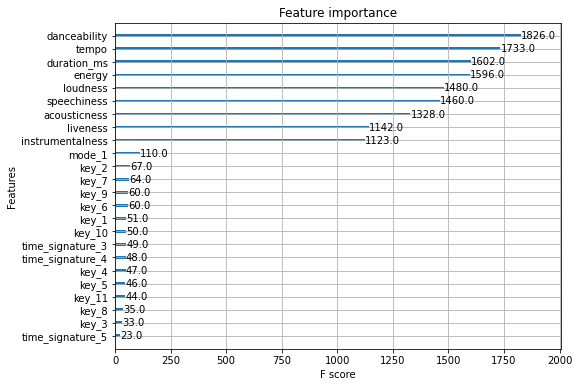

In [233]:
fig = plt.figure(figsize=(8, 6))
xgb.plot_importance(xgb_reg, ax = fig.gca())

* The danceability and the tempo were the most important features in predicting the valence of the tracks. While the time signature and the key levels of the track were the least important features in the predictions